In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from datetime import datetime

In [3]:
X, y = load_breast_cancer().data, load_breast_cancer().target.reshape(-1,1)

In [5]:
X.shape, y.shape

((569, 30), (569, 1))

In [42]:
class nn_build(object):
    def __init__(self, eta = 0.005, iterations = 2000, epsilon = 0.01, layer_dims = [30,50,50,50,1]):
        self.eta = eta
        self.iterations = iterations
        self.epsilon = epsilon
        self.layer_dims = layer_dims
        self.layer = len(layer_dims)
        
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        m_ = len(y)
        i = 1
        parameters = {}
        cost_ = []
        acc_ = []
        
        for l  in range(1,self.layer):
            parameters['W'+str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))
            
        while(i != self.iterations +1 ):
            #forward prop.
            time1 = datetime.now()
            Z1 = np.dot(parameters['W1'], A0) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
            A3 = self.sigmoid(Z3)
            Z4 = np.dot(parameters['W4'], A3) + parameters['b4']
            A4 = self.sigmoid(Z4)
            #cost
            cost = self.cost(A4, y_, m_)
            cost_.append(cost)
            acc = self.acc(y_, np.where(A4>0.5,1,0),m_)
            acc_.append(acc)
            #derivatives
            dZ4 = A4 - y_
            dW4 = (1/m_) * np.dot(dZ4,A3.T)
            db4 =  (1/m_) * np.sum(dZ4, axis =1 , keepdims= True)
            dZ3 =  np.dot(parameters['W4'].T, dZ4) * (A3 * (1-A3))  #(1 - np.power(A3,2))
            dW3 = (1/m_) * np.dot(dZ3,A2.T)
            db3 = (1/m_) * np.sum(dZ3, axis =1 , keepdims= True)
            dZ2 = np.dot(parameters['W3'].T, dZ3) * (A2 * (1-A2)) #(1 - np.power(A2,2))
            dW2 = (1/m_) * np.dot(dZ2,A1.T)
            db2 = (1/m_) * np.sum(dZ2, axis =1 , keepdims= True)
            dZ1 = np.dot(parameters['W2'].T, dZ2) *  (A1 * (1-A1))#(1 - np.power(A1,2))
            dW1 = (1/m_) * np.dot(dZ1,A0.T)
            db1 = (1/m_) * np.sum(dZ1, axis =1 , keepdims= True)           
            #updates
            parameters['W4'] -= self.eta * dW4
            parameters['W3'] -= self.eta * dW3
            parameters['W2'] -= self.eta * dW2
            parameters['W1'] -= self.eta * dW1
            parameters['b4'] -= self.eta * db4
            parameters['b3'] -= self.eta * db3
            parameters['b2'] -= self.eta * db2
            parameters['b1'] -= self.eta * db1
            time2 = datetime.now()         
            step= time2 - time1
            #print
            if i % 100 == 0:
                print(f'epoch:{i}: cost:{cost}: acc:{acc}: time:{step}')             
            i += 1
        #df and plot
        history = pd.DataFrame(cost_, columns = ['cost'])
        history['acc'] = acc_
        plt.figure(figsize = (14,5))
        plt.suptitle(f'Cost Function Monitoring {self.eta} {self.epsilon} {self.layer_dims}')
        plt.subplot(1,2,1)
        plt.plot(history.acc, 'g')
        plt.ylim(0,1)
        plt.subplot(1,2,2)
        plt.plot(history.cost, 'b')       
        plt.show()
        return parameters
    
    def tanh(self,z):
        return (np.exp(z)- np.exp(-z)) / (np.exp(z) + np.exp(-z))
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def acc(self,y_true, y_pred, m_):
        return np.sum(y_true == y_pred)/m_
    
    def cost(self, A4, y_, m_):
        return -(1/m_) * np.sum(y_ * np.log(A4) + (1-y_)*np.log(1-A4))
    
    

epoch:100: cost:0.6603136511371652: acc:0.6274165202108963: time:0:00:00.004556
epoch:200: cost:0.6603128374938665: acc:0.6274165202108963: time:0:00:00.003989
epoch:300: cost:0.6603121777858723: acc:0.6274165202108963: time:0:00:00.003988
epoch:400: cost:0.6603114765216067: acc:0.6274165202108963: time:0:00:00.003364
epoch:500: cost:0.6603105798888034: acc:0.6274165202108963: time:0:00:00.004986
epoch:600: cost:0.6603086990896302: acc:0.6274165202108963: time:0:00:00.002994
epoch:700: cost:0.6603072515125284: acc:0.6274165202108963: time:0:00:00.003993
epoch:800: cost:0.6603064070177024: acc:0.6274165202108963: time:0:00:00.002991
epoch:900: cost:0.6603057159844539: acc:0.6274165202108963: time:0:00:00.003691
epoch:1000: cost:0.6603050048497509: acc:0.6274165202108963: time:0:00:00.003990
epoch:1100: cost:0.6603042495530982: acc:0.6274165202108963: time:0:00:00.002992
epoch:1200: cost:0.6603034212474268: acc:0.6274165202108963: time:0:00:00.003990
epoch:1300: cost:0.6603024804521458: 

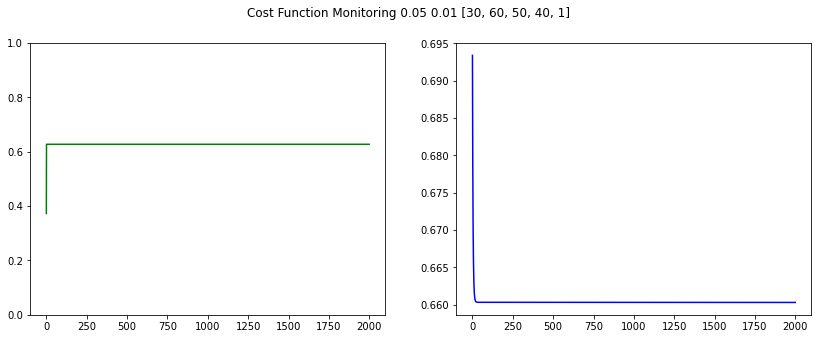

epoch:100: cost:0.6603156101750955: acc:0.6274165202108963: time:0:00:00.002991
epoch:200: cost:0.660315306130354: acc:0.6274165202108963: time:0:00:00.003988
epoch:300: cost:0.6603150299352157: acc:0.6274165202108963: time:0:00:00.004985
epoch:400: cost:0.6603147135194631: acc:0.6274165202108963: time:0:00:00.002992
epoch:500: cost:0.6603143267542044: acc:0.6274165202108963: time:0:00:00.003991
epoch:600: cost:0.6603138897658685: acc:0.6274165202108963: time:0:00:00.002994
epoch:700: cost:0.6603136539453278: acc:0.6274165202108963: time:0:00:00.003990
epoch:800: cost:0.6603134761785623: acc:0.6274165202108963: time:0:00:00.003989
epoch:900: cost:0.6603132956296112: acc:0.6274165202108963: time:0:00:00.002990
epoch:1000: cost:0.6603131054551686: acc:0.6274165202108963: time:0:00:00.003989
epoch:1100: cost:0.6603129014108583: acc:0.6274165202108963: time:0:00:00.003988
epoch:1200: cost:0.6603126776608825: acc:0.6274165202108963: time:0:00:00.003989
epoch:1300: cost:0.6603124264806918: a

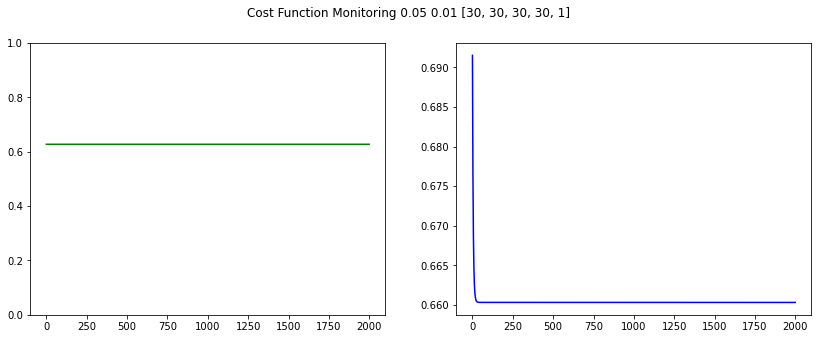

epoch:100: cost:0.6603149586169763: acc:0.6274165202108963: time:0:00:00.011968
epoch:200: cost:0.660313484778423: acc:0.6274165202108963: time:0:00:00.005981
epoch:300: cost:0.6603124169574713: acc:0.6274165202108963: time:0:00:00.005983
epoch:400: cost:0.6603113511226555: acc:0.6274165202108963: time:0:00:00.006004
epoch:500: cost:0.6603101933986242: acc:0.6274165202108963: time:0:00:00.005986
epoch:600: cost:0.6603090580545726: acc:0.6274165202108963: time:0:00:00.005550
epoch:700: cost:0.6603079455764144: acc:0.6274165202108963: time:0:00:00.005984
epoch:800: cost:0.6603068170402467: acc:0.6274165202108963: time:0:00:00.006009
epoch:900: cost:0.6603056428345364: acc:0.6274165202108963: time:0:00:00.005828
epoch:1000: cost:0.6603043358377808: acc:0.6274165202108963: time:0:00:00.007982
epoch:1100: cost:0.6603026863994557: acc:0.6274165202108963: time:0:00:00.010963
epoch:1200: cost:0.6603009586310197: acc:0.6274165202108963: time:0:00:00.007976
epoch:1300: cost:0.6602995303367407: a

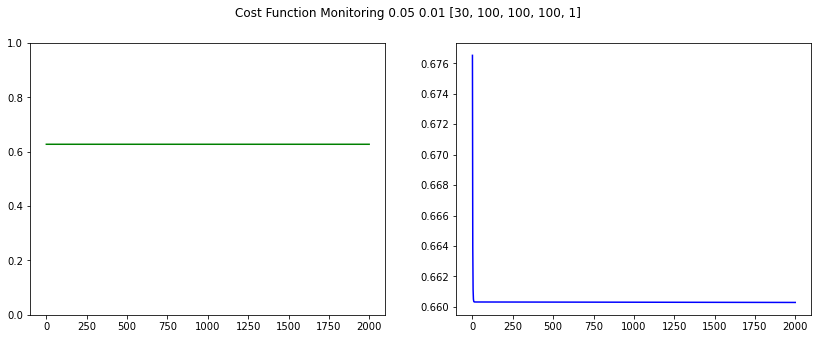

<ipython-input-42-f34adcc55567>:84: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


epoch:100: cost:0.6591010946437988: acc:0.6274165202108963: time:0:00:00.003891
epoch:200: cost:0.6588368373855626: acc:0.6274165202108963: time:0:00:00.003988
epoch:300: cost:0.6576277448266631: acc:0.6274165202108963: time:0:00:00.004606
epoch:400: cost:0.6564789313524618: acc:0.6274165202108963: time:0:00:00.003990
epoch:500: cost:0.6551607375841292: acc:0.6274165202108963: time:0:00:00.003990
epoch:600: cost:0.6533845739514204: acc:0.6274165202108963: time:0:00:00.005984
epoch:700: cost:0.65063806468918: acc:0.6274165202108963: time:0:00:00.004990
epoch:800: cost:0.6472612411162776: acc:0.6274165202108963: time:0:00:00.004988
epoch:900: cost:0.6419631914448586: acc:0.6274165202108963: time:0:00:00.004986
epoch:1000: cost:0.6376327721815798: acc:0.6274165202108963: time:0:00:00.003986
epoch:1100: cost:0.6272517025459305: acc:0.6274165202108963: time:0:00:00.004985
epoch:1200: cost:0.610999060892103: acc:0.6274165202108963: time:0:00:00.003992
epoch:1300: cost:0.5886661299736444: acc

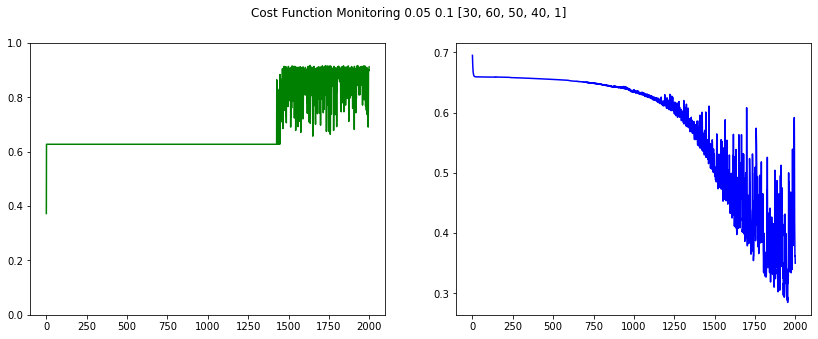

epoch:100: cost:0.6597940167177903: acc:0.6274165202108963: time:0:00:00.002991
epoch:200: cost:0.6585814825744065: acc:0.6274165202108963: time:0:00:00.003990
epoch:300: cost:0.6578657549868736: acc:0.6274165202108963: time:0:00:00.002993
epoch:400: cost:0.65691378785911: acc:0.6274165202108963: time:0:00:00.002991
epoch:500: cost:0.6557445816605221: acc:0.6274165202108963: time:0:00:00.012965
epoch:600: cost:0.6545003422594401: acc:0.6274165202108963: time:0:00:00.003989
epoch:700: cost:0.6526258412172341: acc:0.6274165202108963: time:0:00:00.003989
epoch:800: cost:0.6501880564973069: acc:0.6274165202108963: time:0:00:00.003997
epoch:900: cost:0.6469724220646942: acc:0.6274165202108963: time:0:00:00.014961
epoch:1000: cost:0.64400909471514: acc:0.6274165202108963: time:0:00:00.003991
epoch:1100: cost:0.639308720648915: acc:0.6274165202108963: time:0:00:00.002988
epoch:1200: cost:0.6308491574942383: acc:0.6274165202108963: time:0:00:00.002996
epoch:1300: cost:0.6171950134950249: acc:0

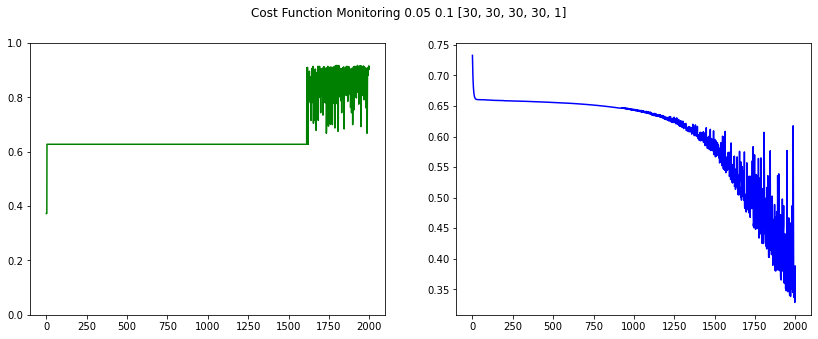

epoch:100: cost:0.6549413997217209: acc:0.6274165202108963: time:0:00:00.005983
epoch:200: cost:0.6504922043955105: acc:0.6274165202108963: time:0:00:00.007980
epoch:300: cost:0.644551002614905: acc:0.6274165202108963: time:0:00:00.006981
epoch:400: cost:0.6329671786199883: acc:0.6274165202108963: time:0:00:00.005987
epoch:500: cost:0.6106762352406973: acc:0.6274165202108963: time:0:00:00.005987
epoch:600: cost:0.5735535135635128: acc:0.6274165202108963: time:0:00:00.009009
epoch:700: cost:0.5188702988718157: acc:0.859402460456942: time:0:00:00.008977
epoch:800: cost:0.47889833430821394: acc:0.8769771528998243: time:0:00:00.008009
epoch:900: cost:0.4207159447578149: acc:0.8717047451669596: time:0:00:00.007982
epoch:1000: cost:0.41690102169322896: acc:0.9050966608084359: time:0:00:00.006982
epoch:1100: cost:0.45783185837841084: acc:0.9068541300527241: time:0:00:00.007983
epoch:1200: cost:0.43069425814513174: acc:0.7398945518453427: time:0:00:00.006983
epoch:1300: cost:0.3329150301483314

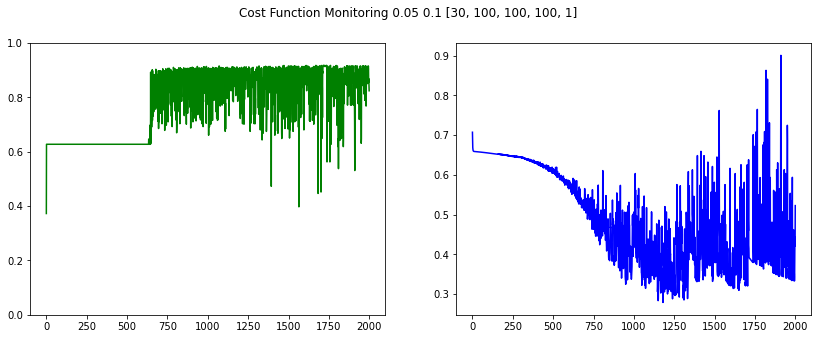

epoch:100: cost:0.46931149237485614: acc:0.8506151142355008: time:0:00:00.008977
epoch:200: cost:0.4756541284003572: acc:0.7504393673110721: time:0:00:00.016956
epoch:300: cost:0.4342349868043763: acc:0.7592267135325131: time:0:00:00.007983
epoch:400: cost:0.45340963470170786: acc:0.8558875219683656: time:0:00:00.007979
epoch:500: cost:0.3700336571675175: acc:0.9015817223198594: time:0:00:00.005985
epoch:600: cost:0.36217244503280926: acc:0.9086115992970123: time:0:00:00.004569
epoch:700: cost:0.3803351665561975: acc:0.8875219683655536: time:0:00:00.004988
epoch:800: cost:0.33640516124805636: acc:0.9103690685413005: time:0:00:00.004986
epoch:900: cost:0.32892886909955593: acc:0.8980667838312829: time:0:00:00.004987
epoch:1000: cost:0.3695866468465124: acc:0.8734622144112478: time:0:00:00.005983
epoch:1100: cost:0.48844746695120345: acc:0.773286467486819: time:0:00:00.005987
epoch:1200: cost:0.36462383463106934: acc:0.8418277680140598: time:0:00:00.004987
epoch:1300: cost:0.297269744018

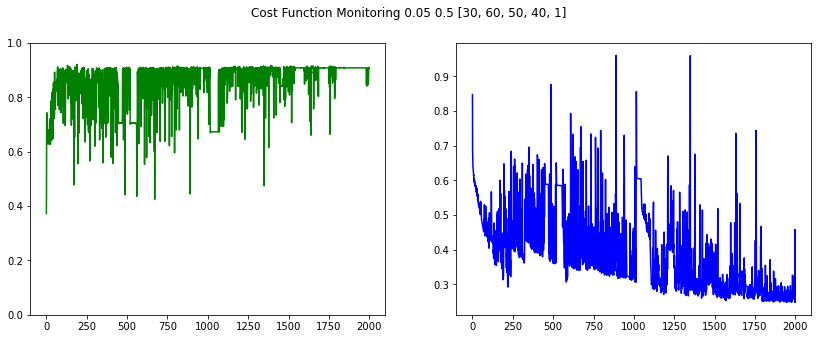

epoch:100: cost:0.5306697412757406: acc:0.8101933216168717: time:0:00:00.003988
epoch:200: cost:0.447182973075287: acc:0.8523725834797891: time:0:00:00.003992
epoch:300: cost:0.390278303921007: acc:0.8963093145869947: time:0:00:00.004985
epoch:400: cost:0.3718433495881172: acc:0.8822495606326889: time:0:00:00.003989
epoch:500: cost:0.30683900896544536: acc:0.8945518453427065: time:0:00:00.003991
epoch:600: cost:0.32724565626607643: acc:0.9121265377855887: time:0:00:00.003988
epoch:700: cost:0.5140049627173127: acc:0.8224956063268892: time:0:00:00.003988
epoch:800: cost:0.41996679488552574: acc:0.7398945518453427: time:0:00:00.002972
epoch:900: cost:0.48605092839278846: acc:0.8260105448154658: time:0:00:00.003989
epoch:1000: cost:0.38135303793945036: acc:0.8963093145869947: time:0:00:00.003990
epoch:1100: cost:0.3583951161403033: acc:0.9015817223198594: time:0:00:00.003989
epoch:1200: cost:0.47726860176241226: acc:0.8471001757469244: time:0:00:00.003990
epoch:1300: cost:0.35376634495002

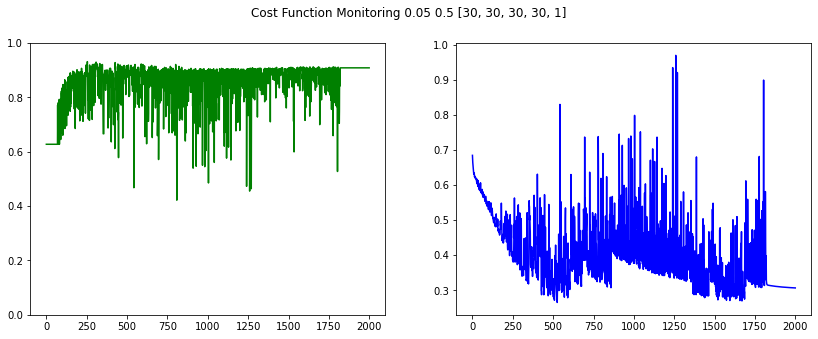

epoch:100: cost:0.39339412944354907: acc:0.8945518453427065: time:0:00:00.009976
epoch:200: cost:0.44009116154702516: acc:0.8242530755711776: time:0:00:00.008975
epoch:300: cost:0.3631038690872207: acc:0.8945518453427065: time:0:00:00.007977
epoch:400: cost:0.3177452441029518: acc:0.9086115992970123: time:0:00:00.007975
epoch:500: cost:0.6319950770811822: acc:0.6572934973637962: time:0:00:00.005985
epoch:600: cost:0.6299289172729302: acc:0.6572934973637962: time:0:00:00.007006
epoch:700: cost:0.5805989011338522: acc:0.680140597539543: time:0:00:00.006982
epoch:800: cost:0.6282055606865002: acc:0.6590509666080844: time:0:00:00.007609
epoch:900: cost:0.6276566371952889: acc:0.6590509666080844: time:0:00:00.006984
epoch:1000: cost:0.6271409101719126: acc:0.6590509666080844: time:0:00:00.006981
epoch:1100: cost:0.6266708971603921: acc:0.6608084358523726: time:0:00:00.010970
epoch:1200: cost:0.626228753562058: acc:0.6608084358523726: time:0:00:00.008974
epoch:1300: cost:0.6256715299433052: 

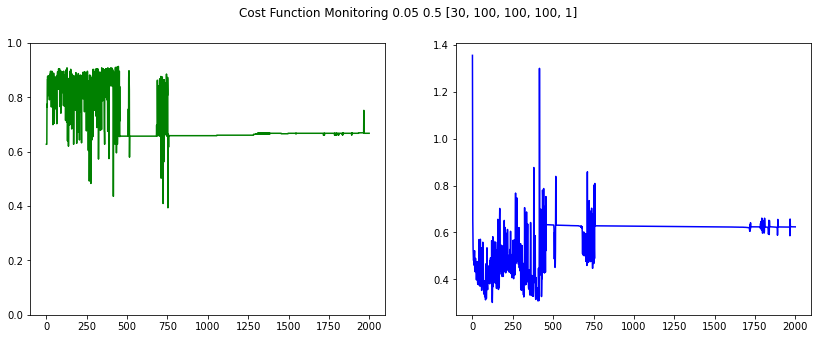

epoch:100: cost:0.6677848226946639: acc:0.6256590509666081: time:0:00:00.004986
epoch:200: cost:0.6545831527306228: acc:0.6379613356766256: time:0:00:00.004986
epoch:300: cost:0.645954055168306: acc:0.6467486818980668: time:0:00:00.005983
epoch:400: cost:0.6408798199594743: acc:0.6625659050966608: time:0:00:00.006982
epoch:500: cost:0.6382068224442061: acc:0.664323374340949: time:0:00:00.006680
epoch:600: cost:0.6365616771133984: acc:0.664323374340949: time:0:00:00.006982
epoch:700: cost:0.635114096831873: acc:0.664323374340949: time:0:00:00.006982
epoch:800: cost:0.6259400698190892: acc:0.6783831282952548: time:0:00:00.005985
epoch:900: cost:0.4444110402553286: acc:0.8787346221441125: time:0:00:00.007100
epoch:1000: cost:0.4186366442886742: acc:0.8681898066783831: time:0:00:00.005982
epoch:1100: cost:0.36154236741770307: acc:0.8998242530755711: time:0:00:00.004987
epoch:1200: cost:0.36905962355013716: acc:0.8822495606326889: time:0:00:00.005985
epoch:1300: cost:0.55332473691419: acc:0

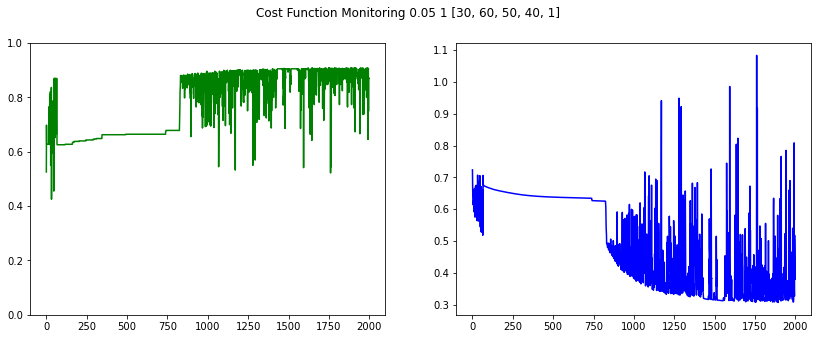

epoch:100: cost:0.3353412514543169: acc:0.8998242530755711: time:0:00:00.004988
epoch:200: cost:0.26710207736595354: acc:0.9121265377855887: time:0:00:00.004992
epoch:300: cost:0.2638083414647039: acc:0.9103690685413005: time:0:00:00.004986
epoch:400: cost:0.26453336137695344: acc:0.9068541300527241: time:0:00:00.003990
epoch:500: cost:0.2420027571278237: acc:0.9103690685413005: time:0:00:00.004984
epoch:600: cost:0.2612083529431085: acc:0.9103690685413005: time:0:00:00.003990
epoch:700: cost:0.24901493354403534: acc:0.9103690685413005: time:0:00:00.005015
epoch:800: cost:0.24245068950989893: acc:0.9138840070298769: time:0:00:00.003988
epoch:900: cost:0.26022056740067645: acc:0.9103690685413005: time:0:00:00.004987
epoch:1000: cost:0.25798151053313545: acc:0.9103690685413005: time:0:00:00.002991
epoch:1100: cost:0.3313411200165062: acc:0.9086115992970123: time:0:00:00.003990
epoch:1200: cost:0.25961153606528964: acc:0.9086115992970123: time:0:00:00.003989
epoch:1300: cost:0.23981902382

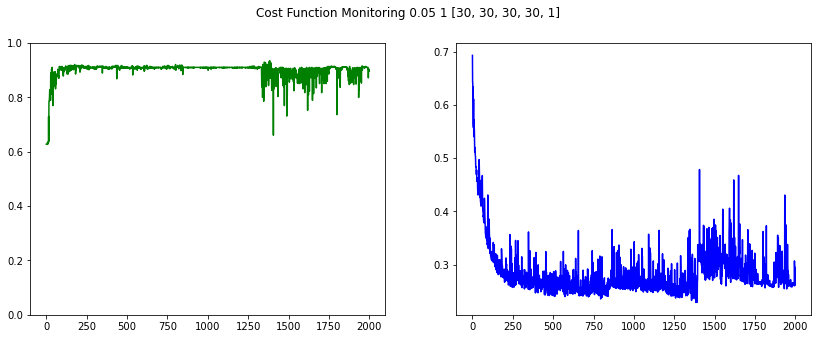

epoch:100: cost:0.47280211291562635: acc:0.8576449912126538: time:0:00:00.009974
epoch:200: cost:0.4018649240333341: acc:0.8646748681898067: time:0:00:00.010964
epoch:300: cost:0.3802214539496169: acc:0.8576449912126538: time:0:00:00.008972
epoch:400: cost:0.2811859806632471: acc:0.9156414762741653: time:0:00:00.011969
epoch:500: cost:0.2589243392057649: acc:0.9050966608084359: time:0:00:00.009974
epoch:600: cost:0.29076004335926736: acc:0.8963093145869947: time:0:00:00.009974
epoch:700: cost:0.2953112122638108: acc:0.8699472759226714: time:0:00:00.011639
epoch:800: cost:0.2830474968464675: acc:0.8822495606326889: time:0:00:00.009000
epoch:900: cost:0.2721093009282116: acc:0.8629173989455184: time:0:00:00.008866
epoch:1000: cost:0.3203563284830889: acc:0.8963093145869947: time:0:00:00.008617
epoch:1100: cost:0.2786675447025042: acc:0.9103690685413005: time:0:00:00.007979
epoch:1200: cost:0.27775021286196655: acc:0.9103690685413005: time:0:00:00.009973
epoch:1300: cost:0.266716244270021

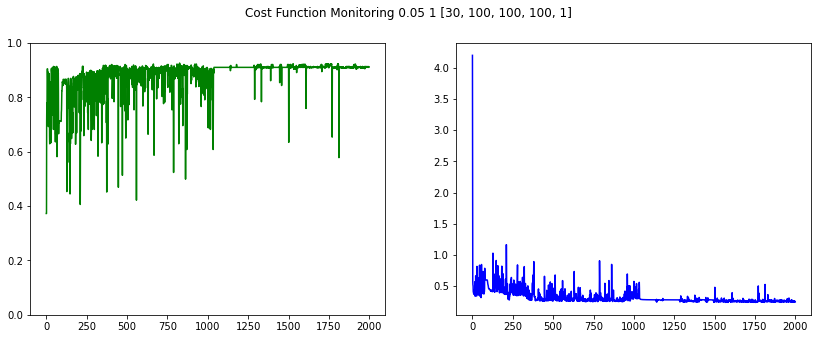

epoch:100: cost:0.6604596392851231: acc:0.6274165202108963: time:0:00:00.004988
epoch:200: cost:0.6603180392947854: acc:0.6274165202108963: time:0:00:00.004966
epoch:300: cost:0.6603161847596162: acc:0.6274165202108963: time:0:00:00.004744
epoch:400: cost:0.6603155542173004: acc:0.6274165202108963: time:0:00:00.006280
epoch:500: cost:0.6603151188715227: acc:0.6274165202108963: time:0:00:00.005985
epoch:600: cost:0.660314763825055: acc:0.6274165202108963: time:0:00:00.005981
epoch:700: cost:0.6603144574510313: acc:0.6274165202108963: time:0:00:00.005987
epoch:800: cost:0.6603141888174111: acc:0.6274165202108963: time:0:00:00.004989
epoch:900: cost:0.6603139499675708: acc:0.6274165202108963: time:0:00:00.005984
epoch:1000: cost:0.66031373419383: acc:0.6274165202108963: time:0:00:00.004985
epoch:1100: cost:0.6603135368277728: acc:0.6274165202108963: time:0:00:00.004963
epoch:1200: cost:0.6603133546959201: acc:0.6274165202108963: time:0:00:00.003991
epoch:1300: cost:0.6603131854114513: acc

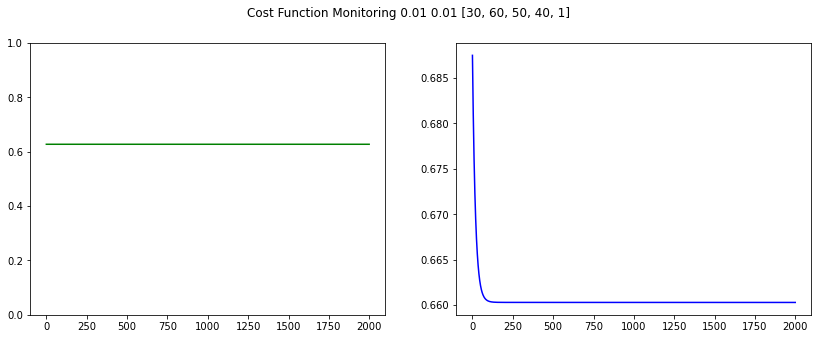

epoch:100: cost:0.6608673724108453: acc:0.6274165202108963: time:0:00:00.003989
epoch:200: cost:0.6603263882762757: acc:0.6274165202108963: time:0:00:00.003989
epoch:300: cost:0.660316923945667: acc:0.6274165202108963: time:0:00:00.004364
epoch:400: cost:0.6603166172622169: acc:0.6274165202108963: time:0:00:00.003993
epoch:500: cost:0.6603164495508275: acc:0.6274165202108963: time:0:00:00.004986
epoch:600: cost:0.6603162700229553: acc:0.6274165202108963: time:0:00:00.003990
epoch:700: cost:0.6603160583871479: acc:0.6274165202108963: time:0:00:00.003992
epoch:800: cost:0.6603157938451133: acc:0.6274165202108963: time:0:00:00.003993
epoch:900: cost:0.6603155431463215: acc:0.6274165202108963: time:0:00:00.004986
epoch:1000: cost:0.6603153786105943: acc:0.6274165202108963: time:0:00:00.003988
epoch:1100: cost:0.6603152775789068: acc:0.6274165202108963: time:0:00:00.003983
epoch:1200: cost:0.6603152055689665: acc:0.6274165202108963: time:0:00:00.003987
epoch:1300: cost:0.6603151466744711: a

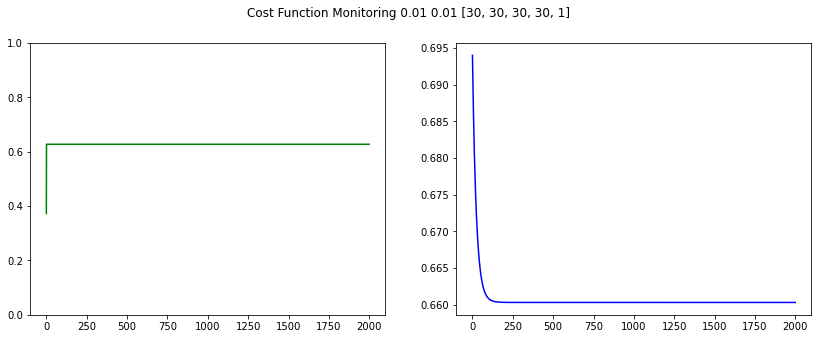

epoch:100: cost:0.6603144248771083: acc:0.6274165202108963: time:0:00:00.006244
epoch:200: cost:0.66031337006317: acc:0.6274165202108963: time:0:00:00.006585
epoch:300: cost:0.6603124858348083: acc:0.6274165202108963: time:0:00:00.007017
epoch:400: cost:0.6603117750049491: acc:0.6274165202108963: time:0:00:00.006564
epoch:500: cost:0.6603112365188639: acc:0.6274165202108963: time:0:00:00.005984
epoch:600: cost:0.6603108007005198: acc:0.6274165202108963: time:0:00:00.006982
epoch:700: cost:0.6603104060518916: acc:0.6274165202108963: time:0:00:00.007978
epoch:800: cost:0.6603100234764515: acc:0.6274165202108963: time:0:00:00.007945
epoch:900: cost:0.6603096413145325: acc:0.6274165202108963: time:0:00:00.007978
epoch:1000: cost:0.6603092541267724: acc:0.6274165202108963: time:0:00:00.007978
epoch:1100: cost:0.6603088582927915: acc:0.6274165202108963: time:0:00:00.007977
epoch:1200: cost:0.660308452118046: acc:0.6274165202108963: time:0:00:00.007979
epoch:1300: cost:0.660308037038015: acc:

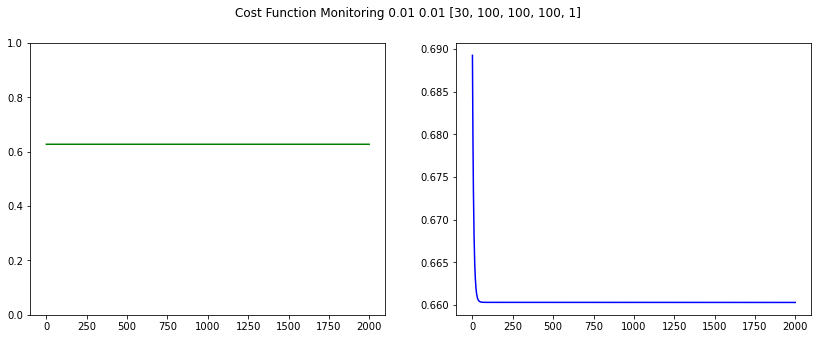

epoch:100: cost:0.6594964554234134: acc:0.6274165202108963: time:0:00:00.005985
epoch:200: cost:0.6581549604089393: acc:0.6274165202108963: time:0:00:00.004988
epoch:300: cost:0.6576899146182267: acc:0.6274165202108963: time:0:00:00.004987
epoch:400: cost:0.657320836645737: acc:0.6274165202108963: time:0:00:00.005991
epoch:500: cost:0.6569548900853999: acc:0.6274165202108963: time:0:00:00.002992
epoch:600: cost:0.6565701074073417: acc:0.6274165202108963: time:0:00:00.005985
epoch:700: cost:0.6561588161495587: acc:0.6274165202108963: time:0:00:00.003989
epoch:800: cost:0.6557137954745199: acc:0.6274165202108963: time:0:00:00.005008
epoch:900: cost:0.6552479412516207: acc:0.6274165202108963: time:0:00:00.004534
epoch:1000: cost:0.6547530563338521: acc:0.6274165202108963: time:0:00:00.003990
epoch:1100: cost:0.6542041747634714: acc:0.6274165202108963: time:0:00:00.003992
epoch:1200: cost:0.6536111742830304: acc:0.6274165202108963: time:0:00:00.004831
epoch:1300: cost:0.6529826795446483: a

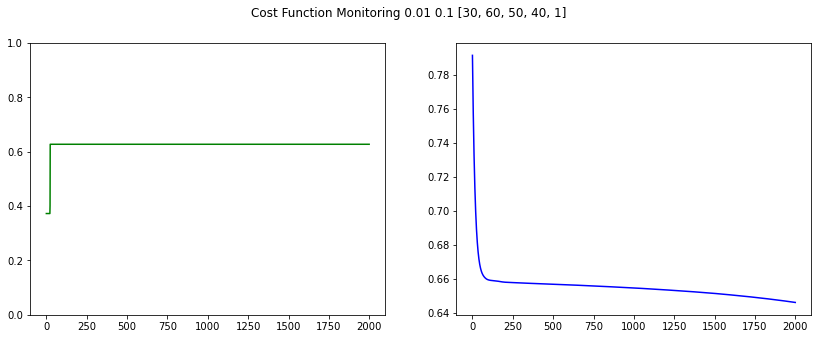

epoch:100: cost:0.6603377379055062: acc:0.6274165202108963: time:0:00:00.004988
epoch:200: cost:0.6602420516624249: acc:0.6274165202108963: time:0:00:00.003989
epoch:300: cost:0.660224123314178: acc:0.6274165202108963: time:0:00:00.005985
epoch:400: cost:0.6602046110134469: acc:0.6274165202108963: time:0:00:00.002994
epoch:500: cost:0.6601808923549947: acc:0.6274165202108963: time:0:00:00.004030
epoch:600: cost:0.6601538972873464: acc:0.6274165202108963: time:0:00:00.004989
epoch:700: cost:0.6601228568815163: acc:0.6274165202108963: time:0:00:00.002990
epoch:800: cost:0.6600900115546013: acc:0.6274165202108963: time:0:00:00.003991
epoch:900: cost:0.6600196063509215: acc:0.6274165202108963: time:0:00:00.003987
epoch:1000: cost:0.6599574231626453: acc:0.6274165202108963: time:0:00:00.002992
epoch:1100: cost:0.659894371649091: acc:0.6274165202108963: time:0:00:00.002995
epoch:1200: cost:0.6598288138331766: acc:0.6274165202108963: time:0:00:00.003989
epoch:1300: cost:0.6597589630019931: ac

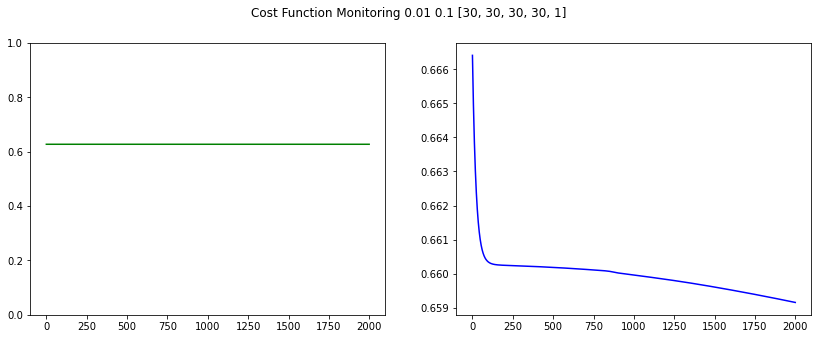

epoch:100: cost:0.6492362362446857: acc:0.6274165202108963: time:0:00:00.008975
epoch:200: cost:0.6439170819439284: acc:0.6274165202108963: time:0:00:00.007980
epoch:300: cost:0.6387757022849478: acc:0.6274165202108963: time:0:00:00.007979
epoch:400: cost:0.6330241825802402: acc:0.6274165202108963: time:0:00:00.008001
epoch:500: cost:0.6271631637420214: acc:0.6274165202108963: time:0:00:00.008977
epoch:600: cost:0.6203943840433455: acc:0.6274165202108963: time:0:00:00.006977
epoch:700: cost:0.6127514417958981: acc:0.6274165202108963: time:0:00:00.006530
epoch:800: cost:0.6041471645957671: acc:0.6274165202108963: time:0:00:00.006044
epoch:900: cost:0.5943910802717736: acc:0.6274165202108963: time:0:00:00.005982
epoch:1000: cost:0.5830814805743297: acc:0.6274165202108963: time:0:00:00.006968
epoch:1100: cost:0.5703327348419978: acc:0.6274165202108963: time:0:00:00.006982
epoch:1200: cost:0.5554957345138846: acc:0.6274165202108963: time:0:00:00.007371
epoch:1300: cost:0.5384803922648667: 

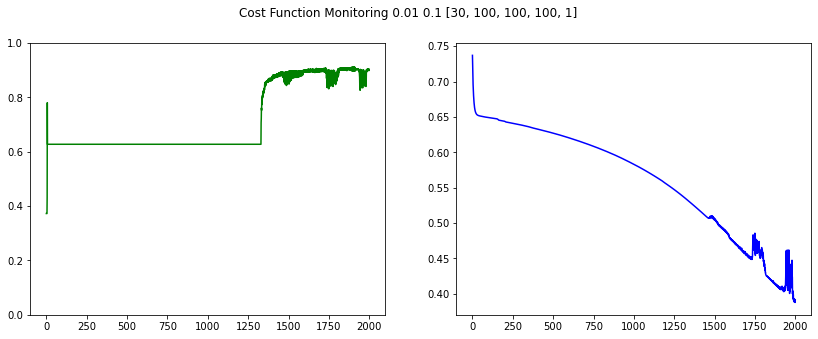

epoch:100: cost:0.5626907706451941: acc:0.6362038664323374: time:0:00:00.004964
epoch:200: cost:0.5243152080390778: acc:0.7434094903339191: time:0:00:00.005162
epoch:300: cost:0.47320348182690164: acc:0.875219683655536: time:0:00:00.004996
epoch:400: cost:0.42997335005456067: acc:0.9103690685413005: time:0:00:00.004986
epoch:500: cost:0.3937401911756521: acc:0.9156414762741653: time:0:00:00.004986
epoch:600: cost:0.3670530619603252: acc:0.9173989455184535: time:0:00:00.004986
epoch:700: cost:0.33972323388282716: acc:0.9226713532513181: time:0:00:00.004977
epoch:800: cost:0.31956547561499904: acc:0.9226713532513181: time:0:00:00.004592
epoch:900: cost:0.3139279942976995: acc:0.9068541300527241: time:0:00:00.004989
epoch:1000: cost:0.28315952250146503: acc:0.9261862917398945: time:0:00:00.005983
epoch:1100: cost:0.27154601675141316: acc:0.9244288224956063: time:0:00:00.006982
epoch:1200: cost:0.26525999626368824: acc:0.9209138840070299: time:0:00:00.006979
epoch:1300: cost:0.270246855995

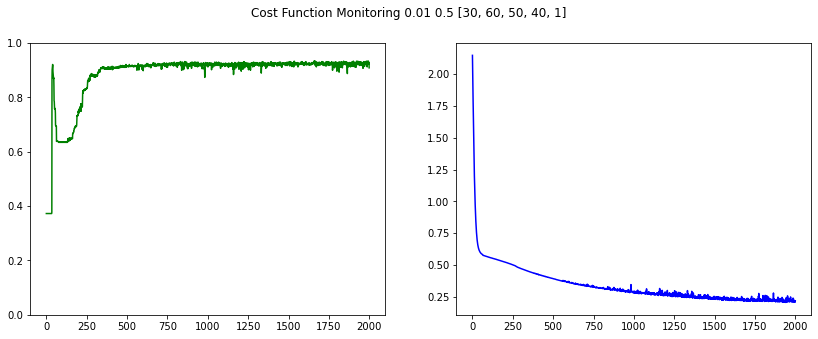

epoch:100: cost:0.6246737386327507: acc:0.6274165202108963: time:0:00:00.003986
epoch:200: cost:0.6108648234174381: acc:0.6274165202108963: time:0:00:00.003990
epoch:300: cost:0.5971661517953353: acc:0.6274165202108963: time:0:00:00.003993
epoch:400: cost:0.5821866205222105: acc:0.6274165202108963: time:0:00:00.003989
epoch:500: cost:0.5661316258864989: acc:0.6274165202108963: time:0:00:00.003990
epoch:600: cost:0.5491113159916703: acc:0.6309314586994728: time:0:00:00.004210
epoch:700: cost:0.5306668044117463: acc:0.6309314586994728: time:0:00:00.003990
epoch:800: cost:0.5116906759497473: acc:0.8681898066783831: time:0:00:00.003987
epoch:900: cost:0.4917348384557831: acc:0.875219683655536: time:0:00:00.004987
epoch:1000: cost:0.47123899489006366: acc:0.8980667838312829: time:0:00:00.003990
epoch:1100: cost:0.45016048343438636: acc:0.9103690685413005: time:0:00:00.003991
epoch:1200: cost:0.4292988871520358: acc:0.9103690685413005: time:0:00:00.004988
epoch:1300: cost:0.4093577512990256:

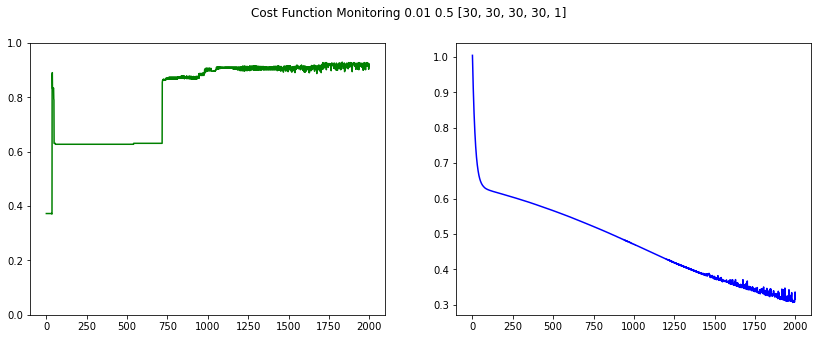

epoch:100: cost:0.41618405112571344: acc:0.836555360281195: time:0:00:00.008098
epoch:200: cost:0.3722212439408806: acc:0.8717047451669596: time:0:00:00.006982
epoch:300: cost:0.3390453158693725: acc:0.8963093145869947: time:0:00:00.007934
epoch:400: cost:0.3087229823907565: acc:0.9015817223198594: time:0:00:00.006982
epoch:500: cost:0.2953051505856253: acc:0.8822495606326889: time:0:00:00.006985
epoch:600: cost:0.293225823167127: acc:0.8945518453427065: time:0:00:00.007019
epoch:700: cost:0.26266146406104457: acc:0.9121265377855887: time:0:00:00.007946
epoch:800: cost:0.27042753197355884: acc:0.9068541300527241: time:0:00:00.008943
epoch:900: cost:0.2506957489093993: acc:0.9138840070298769: time:0:00:00.009493
epoch:1000: cost:0.2479066554447529: acc:0.9068541300527241: time:0:00:00.008463
epoch:1100: cost:0.25782193783407664: acc:0.9033391915641477: time:0:00:00.009974
epoch:1200: cost:0.27930840623712694: acc:0.8787346221441125: time:0:00:00.005989
epoch:1300: cost:0.243984942485240

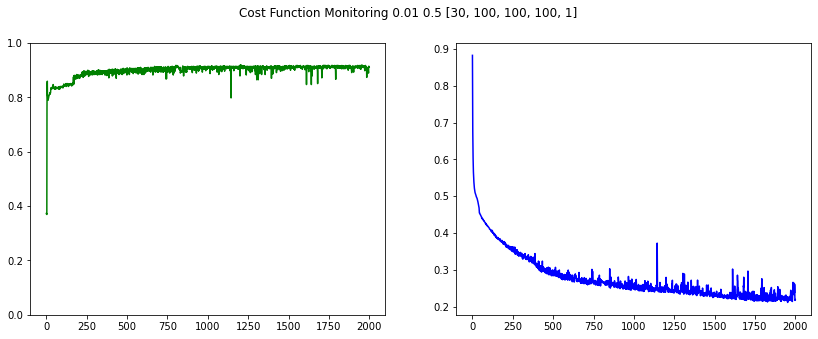

epoch:100: cost:0.42068546653837935: acc:0.8699472759226714: time:0:00:00.006982
epoch:200: cost:0.3596797503461693: acc:0.9086115992970123: time:0:00:00.006982
epoch:300: cost:0.32725851185902405: acc:0.9086115992970123: time:0:00:00.006979
epoch:400: cost:0.3098841894353955: acc:0.9103690685413005: time:0:00:00.006948
epoch:500: cost:0.30240812959226027: acc:0.9121265377855887: time:0:00:00.005608
epoch:600: cost:0.296888675021135: acc:0.9103690685413005: time:0:00:00.006981
epoch:700: cost:0.2822562706901046: acc:0.9156414762741653: time:0:00:00.004987
epoch:800: cost:0.27497527415843154: acc:0.9173989455184535: time:0:00:00.004989
epoch:900: cost:0.2706277137311744: acc:0.9173989455184535: time:0:00:00.004987
epoch:1000: cost:0.26700187134881304: acc:0.9138840070298769: time:0:00:00.005985
epoch:1100: cost:0.28933275777990713: acc:0.8523725834797891: time:0:00:00.004961
epoch:1200: cost:0.25665638199543034: acc:0.8998242530755711: time:0:00:00.004986
epoch:1300: cost:0.259102372479

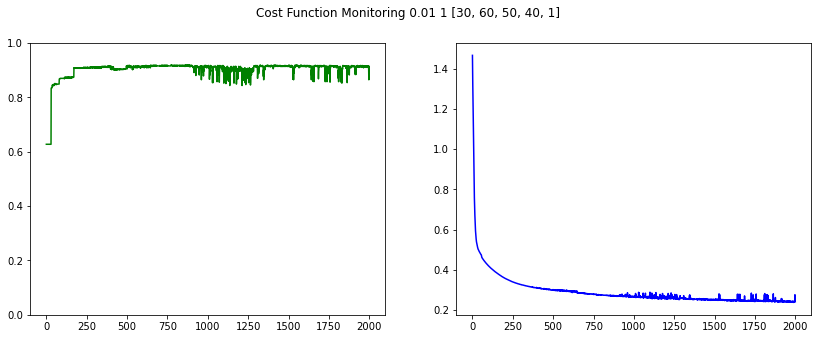

epoch:100: cost:0.6641615482334747: acc:0.6274165202108963: time:0:00:00.005979
epoch:200: cost:0.6639091928727162: acc:0.6274165202108963: time:0:00:00.003989
epoch:300: cost:0.6637639175150453: acc:0.6274165202108963: time:0:00:00.003884
epoch:400: cost:0.663622035850624: acc:0.6274165202108963: time:0:00:00.003987
epoch:500: cost:0.6634819925614729: acc:0.6274165202108963: time:0:00:00.003986
epoch:600: cost:0.6633434554680006: acc:0.6274165202108963: time:0:00:00.004987
epoch:700: cost:0.6632062745950694: acc:0.6274165202108963: time:0:00:00.003993
epoch:800: cost:0.6630703549600785: acc:0.6274165202108963: time:0:00:00.004854
epoch:900: cost:0.6629356259108886: acc:0.6274165202108963: time:0:00:00.004989
epoch:1000: cost:0.662802029571084: acc:0.6274165202108963: time:0:00:00.003988
epoch:1100: cost:0.6626695149368294: acc:0.6274165202108963: time:0:00:00.003326
epoch:1200: cost:0.6625380348080273: acc:0.6274165202108963: time:0:00:00.004160
epoch:1300: cost:0.6624075444270442: ac

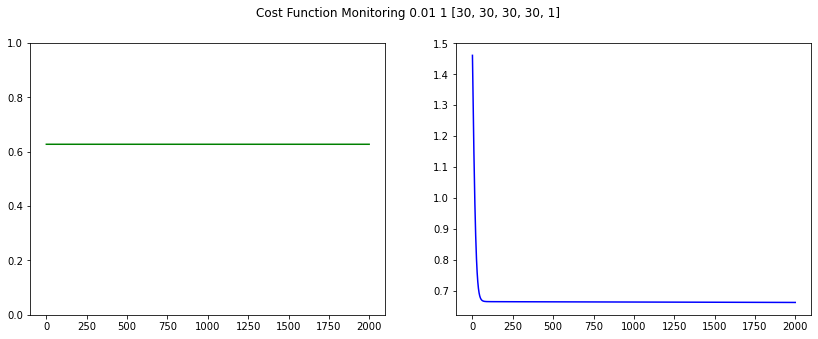

epoch:100: cost:0.24331727731924047: acc:0.8927943760984183: time:0:00:00.009975
epoch:200: cost:0.22970531801886362: acc:0.9068541300527241: time:0:00:00.007947
epoch:300: cost:0.2265046990571203: acc:0.9015817223198594: time:0:00:00.008980
epoch:400: cost:0.3043019529349532: acc:0.8699472759226714: time:0:00:00.008013
epoch:500: cost:0.22029759187086484: acc:0.9068541300527241: time:0:00:00.007976
epoch:600: cost:0.22130453362503089: acc:0.9068541300527241: time:0:00:00.007951
epoch:700: cost:0.21297897811626876: acc:0.9173989455184535: time:0:00:00.008976
epoch:800: cost:0.2140576372647133: acc:0.9086115992970123: time:0:00:00.011972
epoch:900: cost:0.21893385498116508: acc:0.9086115992970123: time:0:00:00.010972
epoch:1000: cost:0.21127967464098554: acc:0.9138840070298769: time:0:00:00.010967
epoch:1100: cost:0.20541004731317236: acc:0.9226713532513181: time:0:00:00.009976
epoch:1200: cost:0.2125086577250668: acc:0.9050966608084359: time:0:00:00.008975
epoch:1300: cost:0.1907196275

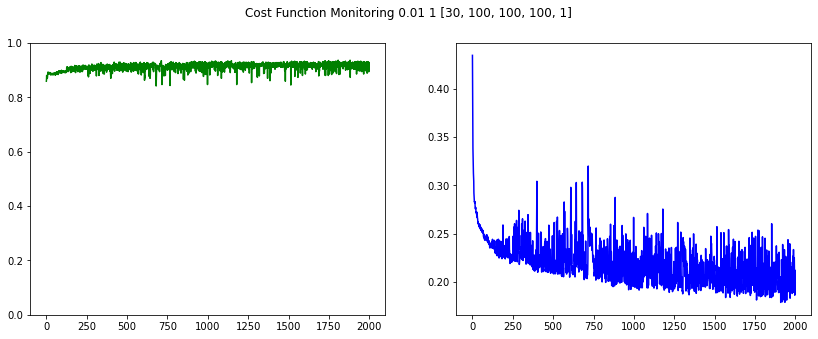

epoch:100: cost:0.6631034347361303: acc:0.6274165202108963: time:0:00:00.005987
epoch:200: cost:0.6605187706004236: acc:0.6274165202108963: time:0:00:00.004987
epoch:300: cost:0.6603316158300344: acc:0.6274165202108963: time:0:00:00.005987
epoch:400: cost:0.6603176108266975: acc:0.6274165202108963: time:0:00:00.005986
epoch:500: cost:0.6603164425602248: acc:0.6274165202108963: time:0:00:00.004943
epoch:600: cost:0.6603162325044446: acc:0.6274165202108963: time:0:00:00.004986
epoch:700: cost:0.6603160955080909: acc:0.6274165202108963: time:0:00:00.004987
epoch:800: cost:0.6603159675248728: acc:0.6274165202108963: time:0:00:00.004986
epoch:900: cost:0.6603158466488621: acc:0.6274165202108963: time:0:00:00.004633
epoch:1000: cost:0.660315734869296: acc:0.6274165202108963: time:0:00:00.004987
epoch:1100: cost:0.6603156324688102: acc:0.6274165202108963: time:0:00:00.003989
epoch:1200: cost:0.6603155380605826: acc:0.6274165202108963: time:0:00:00.005212
epoch:1300: cost:0.6603154493534271: a

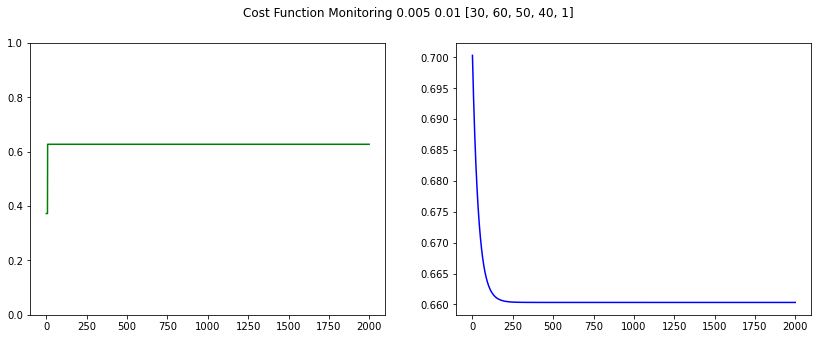

epoch:100: cost:0.6651729232670268: acc:0.6274165202108963: time:0:00:00.003991
epoch:200: cost:0.6609513227136886: acc:0.6274165202108963: time:0:00:00.004987
epoch:300: cost:0.660400688401577: acc:0.6274165202108963: time:0:00:00.004990
epoch:400: cost:0.6603268961826705: acc:0.6274165202108963: time:0:00:00.003989
epoch:500: cost:0.6603168357846171: acc:0.6274165202108963: time:0:00:00.003989
epoch:600: cost:0.6603154140502795: acc:0.6274165202108963: time:0:00:00.004994
epoch:700: cost:0.6603151793335298: acc:0.6274165202108963: time:0:00:00.004990
epoch:800: cost:0.660315112262572: acc:0.6274165202108963: time:0:00:00.003988
epoch:900: cost:0.6603150688748362: acc:0.6274165202108963: time:0:00:00.003788
epoch:1000: cost:0.6603150251025984: acc:0.6274165202108963: time:0:00:00.003988
epoch:1100: cost:0.6603149726492212: acc:0.6274165202108963: time:0:00:00.003989
epoch:1200: cost:0.6603149041688539: acc:0.6274165202108963: time:0:00:00.003988
epoch:1300: cost:0.6603148127288214: ac

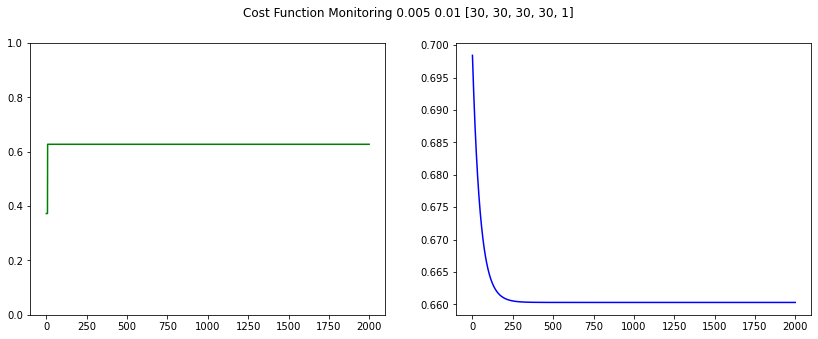

epoch:100: cost:0.6603767996100873: acc:0.6274165202108963: time:0:00:00.007978
epoch:200: cost:0.6603173781704572: acc:0.6274165202108963: time:0:00:00.007978
epoch:300: cost:0.6603168201342678: acc:0.6274165202108963: time:0:00:00.008974
epoch:400: cost:0.6603164506476108: acc:0.6274165202108963: time:0:00:00.006982
epoch:500: cost:0.6603161471769625: acc:0.6274165202108963: time:0:00:00.007429
epoch:600: cost:0.6603158932054021: acc:0.6274165202108963: time:0:00:00.007977
epoch:700: cost:0.660315674645547: acc:0.6274165202108963: time:0:00:00.006012
epoch:800: cost:0.6603154813534323: acc:0.6274165202108963: time:0:00:00.006981
epoch:900: cost:0.6603153060603922: acc:0.6274165202108963: time:0:00:00.006980
epoch:1000: cost:0.6603151435057039: acc:0.6274165202108963: time:0:00:00.006430
epoch:1100: cost:0.6603149901578796: acc:0.6274165202108963: time:0:00:00.006982
epoch:1200: cost:0.6603148442576318: acc:0.6274165202108963: time:0:00:00.006024
epoch:1300: cost:0.6603147056788441: a

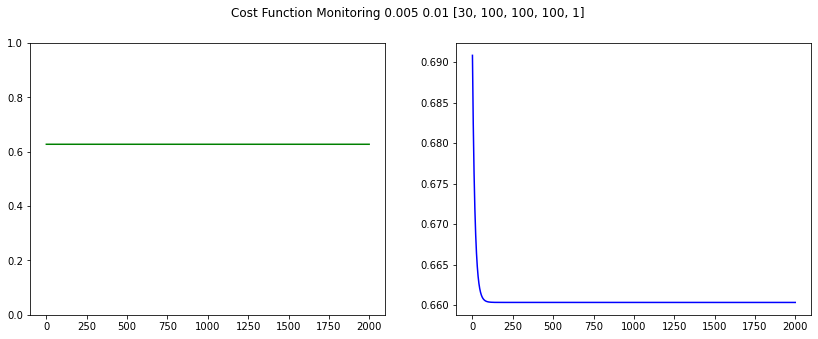

epoch:100: cost:0.6580500761668002: acc:0.6274165202108963: time:0:00:00.004932
epoch:200: cost:0.6578461389649327: acc:0.6274165202108963: time:0:00:00.005207
epoch:300: cost:0.6576660053950446: acc:0.6274165202108963: time:0:00:00.003990
epoch:400: cost:0.657480335023787: acc:0.6274165202108963: time:0:00:00.004984
epoch:500: cost:0.6572977580272071: acc:0.6274165202108963: time:0:00:00.005293
epoch:600: cost:0.6570754348166762: acc:0.6274165202108963: time:0:00:00.004211
epoch:700: cost:0.656753227673987: acc:0.6274165202108963: time:0:00:00.005444
epoch:800: cost:0.6561276112812578: acc:0.6274165202108963: time:0:00:00.004895
epoch:900: cost:0.6556522814621061: acc:0.6274165202108963: time:0:00:00.003991
epoch:1000: cost:0.6553839777222168: acc:0.6274165202108963: time:0:00:00.005983
epoch:1100: cost:0.6551046003505305: acc:0.6274165202108963: time:0:00:00.004989
epoch:1200: cost:0.6548188106649403: acc:0.6274165202108963: time:0:00:00.004987
epoch:1300: cost:0.6545058680362842: ac

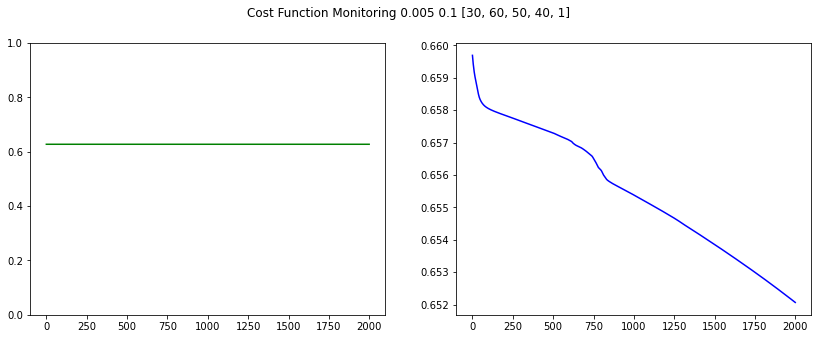

epoch:100: cost:0.663256373835076: acc:0.6274165202108963: time:0:00:00.002996
epoch:200: cost:0.6606507028726853: acc:0.6274165202108963: time:0:00:00.003999
epoch:300: cost:0.6603591956074313: acc:0.6274165202108963: time:0:00:00.002875
epoch:400: cost:0.6603253790892663: acc:0.6274165202108963: time:0:00:00.003778
epoch:500: cost:0.6603210361984521: acc:0.6274165202108963: time:0:00:00.004626
epoch:600: cost:0.6603201629440226: acc:0.6274165202108963: time:0:00:00.004034
epoch:700: cost:0.6603197514810728: acc:0.6274165202108963: time:0:00:00.002863
epoch:800: cost:0.6603194405108128: acc:0.6274165202108963: time:0:00:00.003989
epoch:900: cost:0.6603191778521923: acc:0.6274165202108963: time:0:00:00.002802
epoch:1000: cost:0.6603189498111423: acc:0.6274165202108963: time:0:00:00.003989
epoch:1100: cost:0.6603187490771694: acc:0.6274165202108963: time:0:00:00.003988
epoch:1200: cost:0.6603185704382237: acc:0.6274165202108963: time:0:00:00.003989
epoch:1300: cost:0.6603184098984602: a

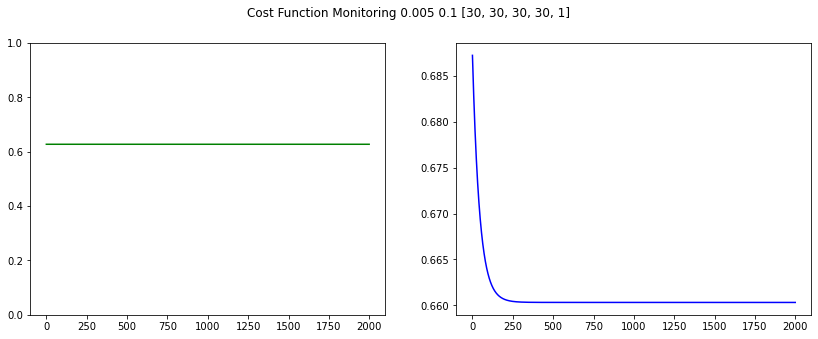

epoch:100: cost:0.658926249186419: acc:0.6274165202108963: time:0:00:00.004985
epoch:200: cost:0.657826609840819: acc:0.6274165202108963: time:0:00:00.007979
epoch:300: cost:0.6570169688861933: acc:0.6274165202108963: time:0:00:00.007152
epoch:400: cost:0.6562659003559032: acc:0.6274165202108963: time:0:00:00.006979
epoch:500: cost:0.6554813278490226: acc:0.6274165202108963: time:0:00:00.005983
epoch:600: cost:0.6536771512890349: acc:0.6274165202108963: time:0:00:00.005964
epoch:700: cost:0.6527116208277981: acc:0.6274165202108963: time:0:00:00.005997
epoch:800: cost:0.6517070904718485: acc:0.6274165202108963: time:0:00:00.006969
epoch:900: cost:0.6506550792074818: acc:0.6274165202108963: time:0:00:00.006980
epoch:1000: cost:0.6495602881921949: acc:0.6274165202108963: time:0:00:00.007979
epoch:1100: cost:0.6484231602029271: acc:0.6274165202108963: time:0:00:00.007979
epoch:1200: cost:0.6472359352102208: acc:0.6274165202108963: time:0:00:00.008980
epoch:1300: cost:0.6459950265546368: ac

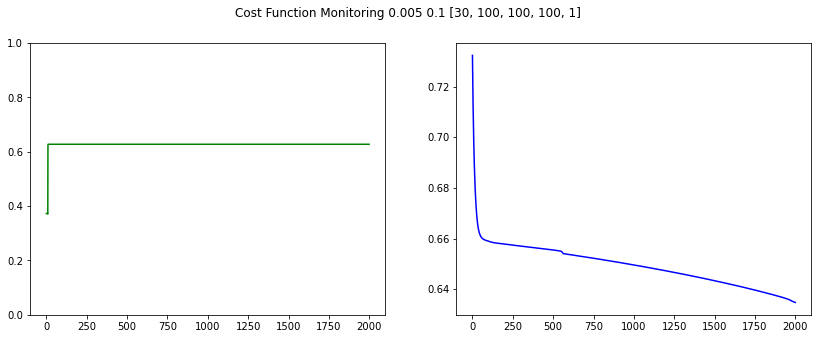

epoch:100: cost:0.603850835070651: acc:0.6274165202108963: time:0:00:00.004987
epoch:200: cost:0.5930699774127046: acc:0.6274165202108963: time:0:00:00.005312
epoch:300: cost:0.5843809546698234: acc:0.6274165202108963: time:0:00:00.005983
epoch:400: cost:0.5756959439478213: acc:0.6274165202108963: time:0:00:00.006981
epoch:500: cost:0.5668691896935065: acc:0.6274165202108963: time:0:00:00.004986
epoch:600: cost:0.5577435219948421: acc:0.6274165202108963: time:0:00:00.004987
epoch:700: cost:0.5481463660856183: acc:0.6291739894551845: time:0:00:00.004987
epoch:800: cost:0.5367044475164925: acc:0.6362038664323374: time:0:00:00.004988
epoch:900: cost:0.5252779451034237: acc:0.7820738137082601: time:0:00:00.005986
epoch:1000: cost:0.5120947700390581: acc:0.8822495606326889: time:0:00:00.009971
epoch:1100: cost:0.49852456439714354: acc:0.8875219683655536: time:0:00:00.004985
epoch:1200: cost:0.4855303871390942: acc:0.9015817223198594: time:0:00:00.005985
epoch:1300: cost:0.4725862735038327: 

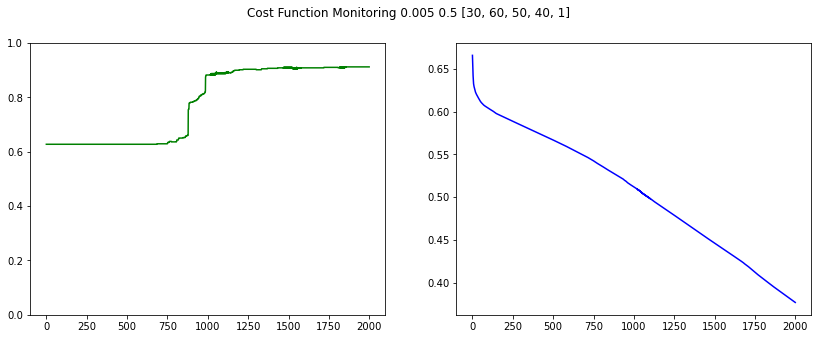

epoch:100: cost:0.6605044646754955: acc:0.6274165202108963: time:0:00:00.003989
epoch:200: cost:0.6491297871859513: acc:0.6274165202108963: time:0:00:00.003991
epoch:300: cost:0.6478624618614587: acc:0.6274165202108963: time:0:00:00.003990
epoch:400: cost:0.6469564766073456: acc:0.6274165202108963: time:0:00:00.004005
epoch:500: cost:0.6460535596281106: acc:0.6274165202108963: time:0:00:00.003992
epoch:600: cost:0.6451189627804669: acc:0.6274165202108963: time:0:00:00.004650
epoch:700: cost:0.6435682348714796: acc:0.6274165202108963: time:0:00:00.003989
epoch:800: cost:0.6313856403415364: acc:0.6274165202108963: time:0:00:00.003725
epoch:900: cost:0.6262496793515434: acc:0.6274165202108963: time:0:00:00.003989
epoch:1000: cost:0.6214607113347657: acc:0.6274165202108963: time:0:00:00.003889
epoch:1100: cost:0.6165371660669156: acc:0.6274165202108963: time:0:00:00.003987
epoch:1200: cost:0.6116884394476544: acc:0.6274165202108963: time:0:00:00.003991
epoch:1300: cost:0.6067895863446459: 

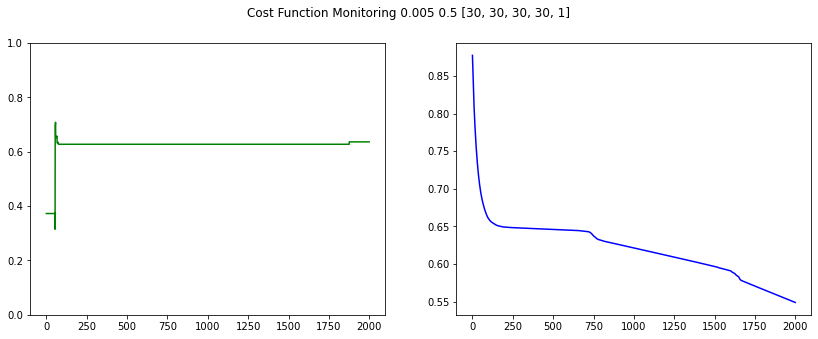

epoch:100: cost:0.567730519710161: acc:0.6836555360281195: time:0:00:00.007979
epoch:200: cost:0.5220504470206867: acc:0.7275922671353251: time:0:00:00.007977
epoch:300: cost:0.47660141302204545: acc:0.859402460456942: time:0:00:00.009006
epoch:400: cost:0.4399205294349667: acc:0.8927943760984183: time:0:00:00.008009
epoch:500: cost:0.40933704066680743: acc:0.9103690685413005: time:0:00:00.006981
epoch:600: cost:0.3834534942611037: acc:0.9103690685413005: time:0:00:00.009974
epoch:700: cost:0.36113015955887523: acc:0.9121265377855887: time:0:00:00.007979
epoch:800: cost:0.3420796895653374: acc:0.9121265377855887: time:0:00:00.007980
epoch:900: cost:0.3257467513203138: acc:0.9121265377855887: time:0:00:00.008013
epoch:1000: cost:0.3115161199924647: acc:0.9138840070298769: time:0:00:00.006981
epoch:1100: cost:0.29900782172900986: acc:0.9191564147627417: time:0:00:00.007945
epoch:1200: cost:0.2877083454140083: acc:0.9191564147627417: time:0:00:00.008012
epoch:1300: cost:0.2778037064639913

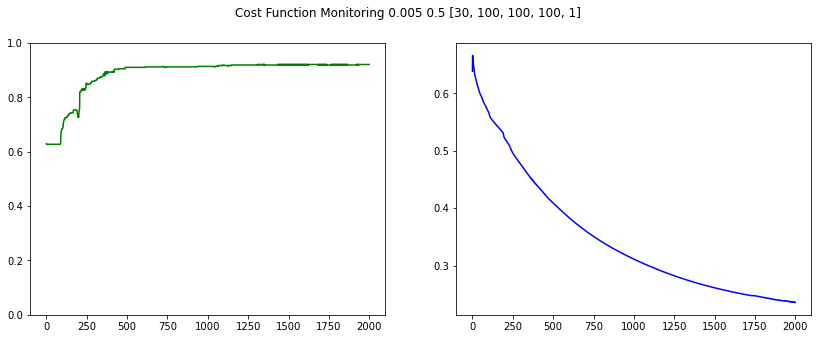

epoch:100: cost:0.4707766523692927: acc:0.8822495606326889: time:0:00:00.006995
epoch:200: cost:0.4340501058452534: acc:0.8840070298769771: time:0:00:00.006981
epoch:300: cost:0.4038634812178651: acc:0.8875219683655536: time:0:00:00.006981
epoch:400: cost:0.38027480083609155: acc:0.8875219683655536: time:0:00:00.005984
epoch:500: cost:0.3608067686736738: acc:0.8910369068541301: time:0:00:00.005987
epoch:600: cost:0.3449576776127941: acc:0.9050966608084359: time:0:00:00.005985
epoch:700: cost:0.331827775076799: acc:0.9050966608084359: time:0:00:00.005984
epoch:800: cost:0.3207741796203213: acc:0.9050966608084359: time:0:00:00.004986
epoch:900: cost:0.31128087385434183: acc:0.9015817223198594: time:0:00:00.004987
epoch:1000: cost:0.3025786986645417: acc:0.9033391915641477: time:0:00:00.006003
epoch:1100: cost:0.29629161423217504: acc:0.9050966608084359: time:0:00:00.006123
epoch:1200: cost:0.28950996069872137: acc:0.9050966608084359: time:0:00:00.005983
epoch:1300: cost:0.283222620029555

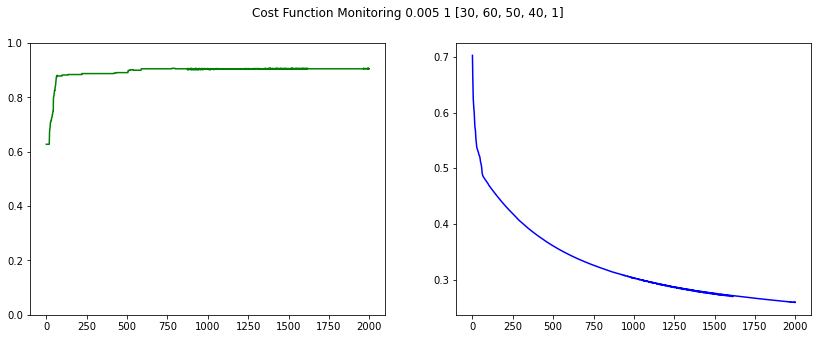

epoch:100: cost:0.669985981362672: acc:0.6274165202108963: time:0:00:00.004964
epoch:200: cost:0.6650231971346287: acc:0.6274165202108963: time:0:00:00.003989
epoch:300: cost:0.6639123952444407: acc:0.6274165202108963: time:0:00:00.003990
epoch:400: cost:0.6628767757625761: acc:0.6274165202108963: time:0:00:00.004987
epoch:500: cost:0.6618594201211454: acc:0.6274165202108963: time:0:00:00.004988
epoch:600: cost:0.6608591043706883: acc:0.6274165202108963: time:0:00:00.005390
epoch:700: cost:0.6598753835112349: acc:0.6274165202108963: time:0:00:00.003989
epoch:800: cost:0.6589077369542126: acc:0.6274165202108963: time:0:00:00.003990
epoch:900: cost:0.6579554988280735: acc:0.6274165202108963: time:0:00:00.003646
epoch:1000: cost:0.6570176097887195: acc:0.6274165202108963: time:0:00:00.003990
epoch:1100: cost:0.6555032837356725: acc:0.6274165202108963: time:0:00:00.003990
epoch:1200: cost:0.6422565228131352: acc:0.6291739894551845: time:0:00:00.003989
epoch:1300: cost:0.6209269178262354: a

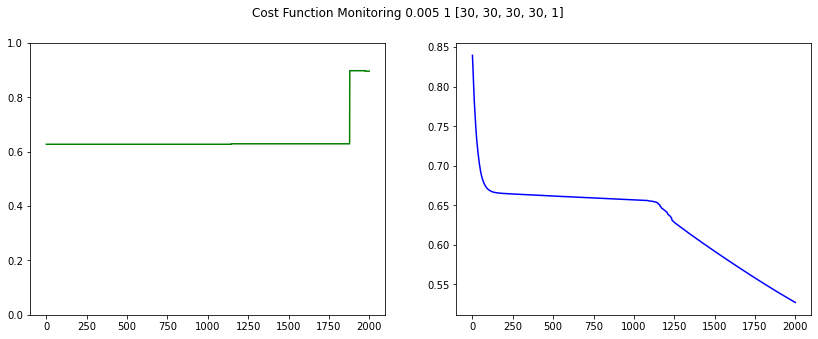

epoch:100: cost:0.3055586382237527: acc:0.8787346221441125: time:0:00:00.007978
epoch:200: cost:0.29606667850525814: acc:0.8875219683655536: time:0:00:00.009711
epoch:300: cost:0.29006712133702056: acc:0.8857644991212654: time:0:00:00.008238
epoch:400: cost:0.2857852868177438: acc:0.8892794376098418: time:0:00:00.007786
epoch:500: cost:0.2848093085695903: acc:0.8875219683655536: time:0:00:00.009012
epoch:600: cost:0.2793321126598143: acc:0.8927943760984183: time:0:00:00.007979
epoch:700: cost:0.2767527477719005: acc:0.8980667838312829: time:0:00:00.009923
epoch:800: cost:0.27501543957798374: acc:0.8980667838312829: time:0:00:00.008975
epoch:900: cost:0.27339286773906973: acc:0.8980667838312829: time:0:00:00.010971
epoch:1000: cost:0.27187038467542696: acc:0.8980667838312829: time:0:00:00.008931
epoch:1100: cost:0.2705771316348253: acc:0.8980667838312829: time:0:00:00.010971
epoch:1200: cost:0.2692775644147467: acc:0.8980667838312829: time:0:00:00.007979
epoch:1300: cost:0.2671190338194

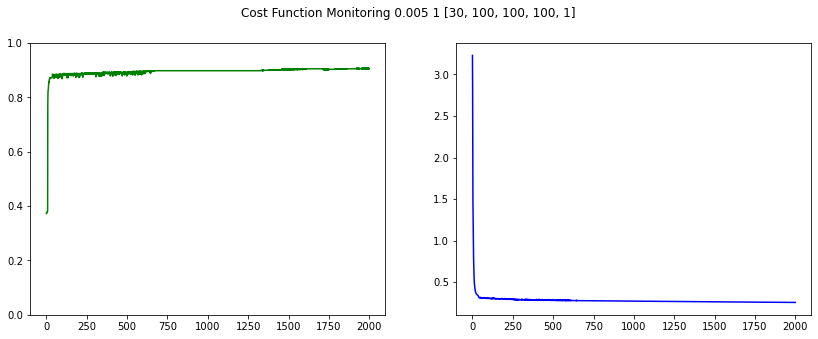

epoch:100: cost:0.6864020300317619: acc:0.6274165202108963: time:0:00:00.004985
epoch:200: cost:0.6801934951790385: acc:0.6274165202108963: time:0:00:00.005983
epoch:300: cost:0.6754781713092085: acc:0.6274165202108963: time:0:00:00.005988
epoch:400: cost:0.6718934937512212: acc:0.6274165202108963: time:0:00:00.004987
epoch:500: cost:0.6691653648178524: acc:0.6274165202108963: time:0:00:00.003990
epoch:600: cost:0.6670867211162741: acc:0.6274165202108963: time:0:00:00.004986
epoch:700: cost:0.6655011139734138: acc:0.6274165202108963: time:0:00:00.006982
epoch:800: cost:0.6642902485491672: acc:0.6274165202108963: time:0:00:00.003985
epoch:900: cost:0.6633645796860304: acc:0.6274165202108963: time:0:00:00.004985
epoch:1000: cost:0.6626562356082863: acc:0.6274165202108963: time:0:00:00.003991
epoch:1100: cost:0.6621136996193471: acc:0.6274165202108963: time:0:00:00.003990
epoch:1200: cost:0.661697813131407: acc:0.6274165202108963: time:0:00:00.004290
epoch:1300: cost:0.661378769484371: ac

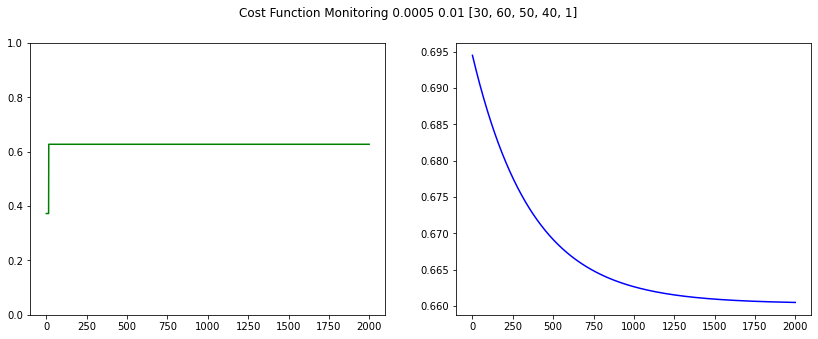

epoch:100: cost:0.6839321343245665: acc:0.6274165202108963: time:0:00:00.003991
epoch:200: cost:0.6794714885155209: acc:0.6274165202108963: time:0:00:00.006027
epoch:300: cost:0.6758628444086946: acc:0.6274165202108963: time:0:00:00.004010
epoch:400: cost:0.6729417891650376: acc:0.6274165202108963: time:0:00:00.003985
epoch:500: cost:0.6705757969200459: acc:0.6274165202108963: time:0:00:00.003263
epoch:600: cost:0.6686581013575175: acc:0.6274165202108963: time:0:00:00.002995
epoch:700: cost:0.6671026951877542: acc:0.6274165202108963: time:0:00:00.003989
epoch:800: cost:0.6658402761288441: acc:0.6274165202108963: time:0:00:00.003991
epoch:900: cost:0.6648149749407872: acc:0.6274165202108963: time:0:00:00.003989
epoch:1000: cost:0.663981722372749: acc:0.6274165202108963: time:0:00:00.003990
epoch:1100: cost:0.6633041340360284: acc:0.6274165202108963: time:0:00:00.002993
epoch:1200: cost:0.6627528129133637: acc:0.6274165202108963: time:0:00:00.002992
epoch:1300: cost:0.6623039874659409: a

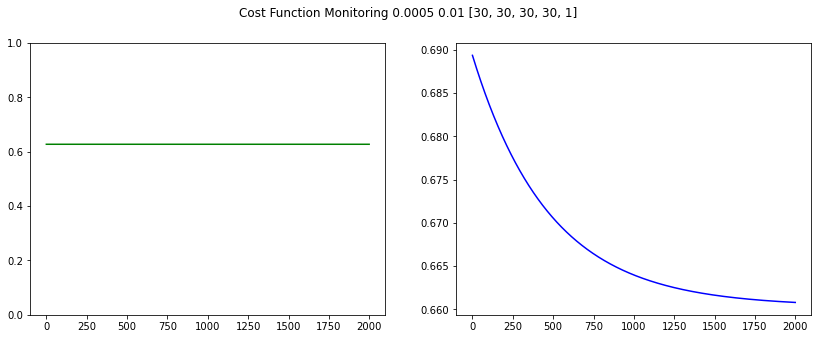

epoch:100: cost:0.6774758270626878: acc:0.6274165202108963: time:0:00:00.007948
epoch:200: cost:0.6693939494587484: acc:0.6274165202108963: time:0:00:00.007981
epoch:300: cost:0.6651448858696579: acc:0.6274165202108963: time:0:00:00.008975
epoch:400: cost:0.6628964188428766: acc:0.6274165202108963: time:0:00:00.006983
epoch:500: cost:0.661699711080052: acc:0.6274165202108963: time:0:00:00.006019
epoch:600: cost:0.6610597439636923: acc:0.6274165202108963: time:0:00:00.006982
epoch:700: cost:0.6607162124439476: acc:0.6274165202108963: time:0:00:00.006981
epoch:800: cost:0.6605312638656046: acc:0.6274165202108963: time:0:00:00.005984
epoch:900: cost:0.6604314651003409: acc:0.6274165202108963: time:0:00:00.006991
epoch:1000: cost:0.6603775163044295: acc:0.6274165202108963: time:0:00:00.006963
epoch:1100: cost:0.6603483089907971: acc:0.6274165202108963: time:0:00:00.006980
epoch:1200: cost:0.6603324742267885: acc:0.6274165202108963: time:0:00:00.008957
epoch:1300: cost:0.6603238760047014: a

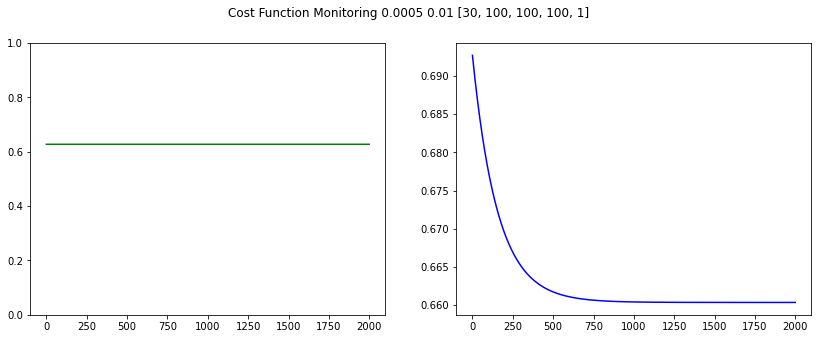

epoch:100: cost:0.6827732816641414: acc:0.6274165202108963: time:0:00:00.004987
epoch:200: cost:0.6774618068992149: acc:0.6274165202108963: time:0:00:00.004984
epoch:300: cost:0.6733973878368895: acc:0.6274165202108963: time:0:00:00.004631
epoch:400: cost:0.6702894838222943: acc:0.6274165202108963: time:0:00:00.005981
epoch:500: cost:0.6679041855672021: acc:0.6274165202108963: time:0:00:00.004987
epoch:600: cost:0.6660735657411578: acc:0.6274165202108963: time:0:00:00.003987
epoch:700: cost:0.6646742733992547: acc:0.6274165202108963: time:0:00:00.004987
epoch:800: cost:0.6636022666353627: acc:0.6274165202108963: time:0:00:00.004986
epoch:900: cost:0.6627791354830842: acc:0.6274165202108963: time:0:00:00.005986
epoch:1000: cost:0.662144988868989: acc:0.6274165202108963: time:0:00:00.005984
epoch:1100: cost:0.6616545289707844: acc:0.6274165202108963: time:0:00:00.005990
epoch:1200: cost:0.6612737774468826: acc:0.6274165202108963: time:0:00:00.004986
epoch:1300: cost:0.6609764158305332: a

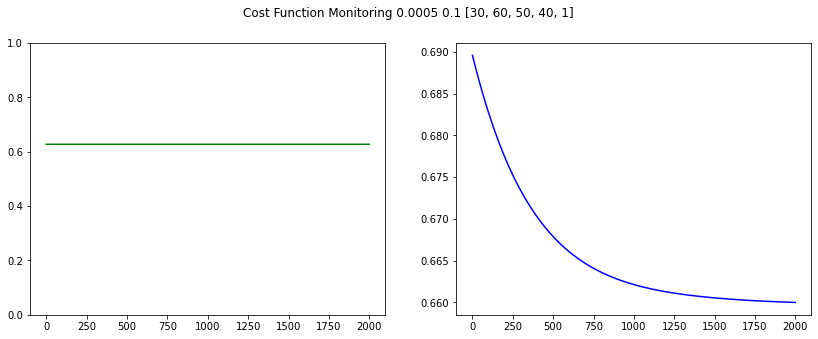

epoch:100: cost:0.7062740945530345: acc:0.37258347978910367: time:0:00:00.003990
epoch:200: cost:0.6970754160289127: acc:0.37258347978910367: time:0:00:00.003987
epoch:300: cost:0.6897802387506472: acc:0.6274165202108963: time:0:00:00.003957
epoch:400: cost:0.6839664766018326: acc:0.6274165202108963: time:0:00:00.003988
epoch:500: cost:0.6793246064353256: acc:0.6274165202108963: time:0:00:00.003990
epoch:600: cost:0.6756130436118687: acc:0.6274165202108963: time:0:00:00.002991
epoch:700: cost:0.6726420596326309: acc:0.6274165202108963: time:0:00:00.004982
epoch:800: cost:0.6702606023221086: acc:0.6274165202108963: time:0:00:00.004984
epoch:900: cost:0.6683484249767547: acc:0.6274165202108963: time:0:00:00.005985
epoch:1000: cost:0.6668093476394986: acc:0.6274165202108963: time:0:00:00.004986
epoch:1100: cost:0.6655694180605116: acc:0.6274165202108963: time:0:00:00.003992
epoch:1200: cost:0.6645744446318911: acc:0.6274165202108963: time:0:00:00.004989
epoch:1300: cost:0.6637744137724073

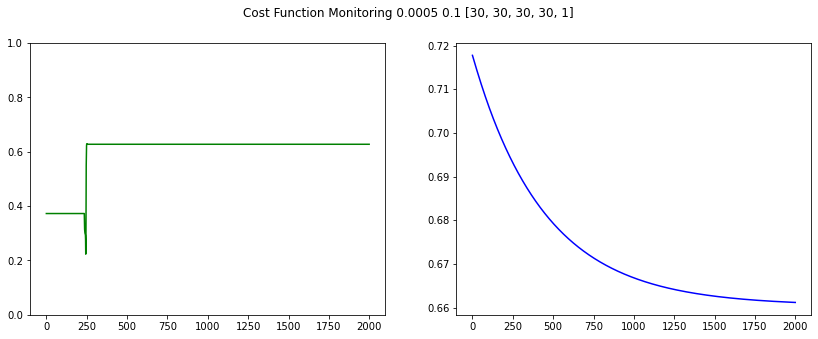

epoch:100: cost:0.668204966887457: acc:0.6274165202108963: time:0:00:00.006981
epoch:200: cost:0.6628528495307773: acc:0.6274165202108963: time:0:00:00.005984
epoch:300: cost:0.660399713608762: acc:0.6274165202108963: time:0:00:00.007012
epoch:400: cost:0.6592944146305286: acc:0.6274165202108963: time:0:00:00.011938
epoch:500: cost:0.65876660614803: acc:0.6274165202108963: time:0:00:00.005986
epoch:600: cost:0.6584911901127186: acc:0.6274165202108963: time:0:00:00.010006
epoch:700: cost:0.6583324048954413: acc:0.6274165202108963: time:0:00:00.007978
epoch:800: cost:0.6582331156669268: acc:0.6274165202108963: time:0:00:00.008976
epoch:900: cost:0.6581522619403597: acc:0.6274165202108963: time:0:00:00.006986
epoch:1000: cost:0.6580769762248029: acc:0.6274165202108963: time:0:00:00.007979
epoch:1100: cost:0.6580201987630756: acc:0.6274165202108963: time:0:00:00.008975
epoch:1200: cost:0.6579665867173177: acc:0.6274165202108963: time:0:00:00.005984
epoch:1300: cost:0.6579098200672712: acc:

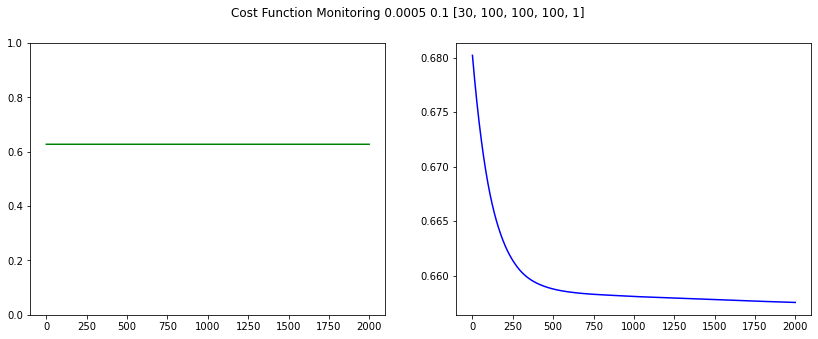

epoch:100: cost:0.6651921343027614: acc:0.6274165202108963: time:0:00:00.005982
epoch:200: cost:0.6646467839876272: acc:0.6274165202108963: time:0:00:00.004986
epoch:300: cost:0.6644486818566011: acc:0.6274165202108963: time:0:00:00.006981
epoch:400: cost:0.6643105685095607: acc:0.6274165202108963: time:0:00:00.006979
epoch:500: cost:0.6641956567638185: acc:0.6274165202108963: time:0:00:00.005979
epoch:600: cost:0.6640902494215575: acc:0.6274165202108963: time:0:00:00.004987
epoch:700: cost:0.663988388610856: acc:0.6274165202108963: time:0:00:00.005493
epoch:800: cost:0.663889451357958: acc:0.6274165202108963: time:0:00:00.004990
epoch:900: cost:0.6637948102485621: acc:0.6274165202108963: time:0:00:00.005000
epoch:1000: cost:0.6637039596880808: acc:0.6274165202108963: time:0:00:00.004986
epoch:1100: cost:0.6636152697651616: acc:0.6274165202108963: time:0:00:00.004987
epoch:1200: cost:0.6635286934277421: acc:0.6274165202108963: time:0:00:00.004987
epoch:1300: cost:0.6634465721297194: ac

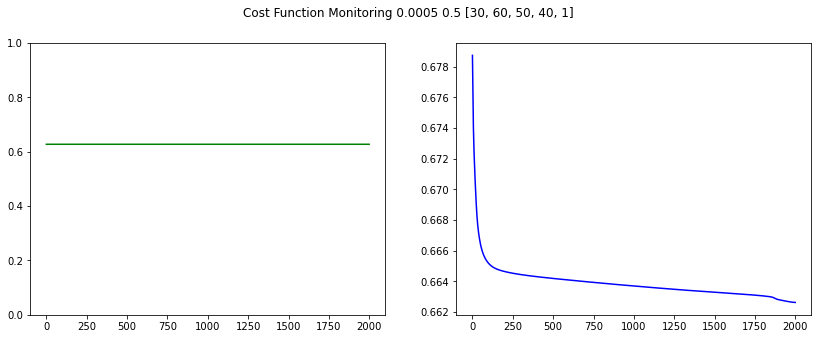

epoch:100: cost:0.720879181680527: acc:0.37258347978910367: time:0:00:00.004988
epoch:200: cost:0.701352608345117: acc:0.37258347978910367: time:0:00:00.003989
epoch:300: cost:0.688139660683275: acc:0.6379613356766256: time:0:00:00.005985
epoch:400: cost:0.6791976787928171: acc:0.6274165202108963: time:0:00:00.003988
epoch:500: cost:0.673135894923912: acc:0.6274165202108963: time:0:00:00.003990
epoch:600: cost:0.6690164670908033: acc:0.6274165202108963: time:0:00:00.003765
epoch:700: cost:0.6662092263876525: acc:0.6274165202108963: time:0:00:00.004724
epoch:800: cost:0.6642907546287987: acc:0.6274165202108963: time:0:00:00.003990
epoch:900: cost:0.6629760111062345: acc:0.6274165202108963: time:0:00:00.003814
epoch:1000: cost:0.6620725627131234: acc:0.6274165202108963: time:0:00:00.003145
epoch:1100: cost:0.6614500802578138: acc:0.6274165202108963: time:0:00:00.003973
epoch:1200: cost:0.6610200116503604: acc:0.6274165202108963: time:0:00:00.003989
epoch:1300: cost:0.6607220068065359: ac

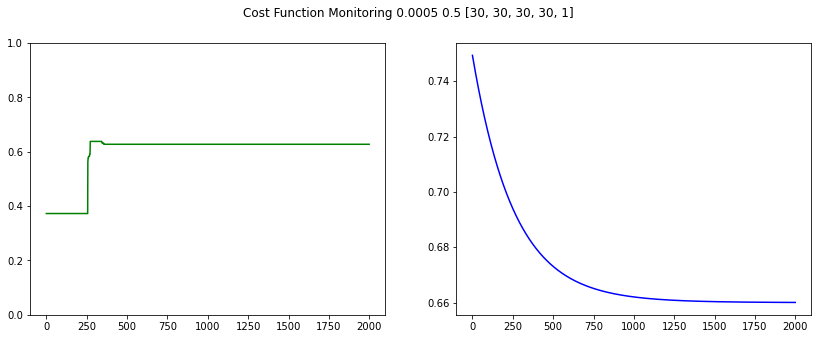

epoch:100: cost:1.3787286733277044: acc:0.37258347978910367: time:0:00:00.009974
epoch:200: cost:0.7712601470561904: acc:0.37258347978910367: time:0:00:00.007951
epoch:300: cost:0.6166890433671885: acc:0.8998242530755711: time:0:00:00.008979
epoch:400: cost:0.5831503196727226: acc:0.8172231985940246: time:0:00:00.007979
epoch:500: cost:0.573211476254524: acc:0.6449912126537786: time:0:00:00.006981
epoch:600: cost:0.5691374833232767: acc:0.6449912126537786: time:0:00:00.007980
epoch:700: cost:0.5660174254487544: acc:0.6309314586994728: time:0:00:00.006147
epoch:800: cost:0.5626684020906072: acc:0.6309314586994728: time:0:00:00.007808
epoch:900: cost:0.5597061282785715: acc:0.6309314586994728: time:0:00:00.008210
epoch:1000: cost:0.5567690928003155: acc:0.6309314586994728: time:0:00:00.006026
epoch:1100: cost:0.5538468811311567: acc:0.632688927943761: time:0:00:00.013963
epoch:1200: cost:0.5512684669134704: acc:0.6414762741652021: time:0:00:00.018948
epoch:1300: cost:0.5487043419953447: 

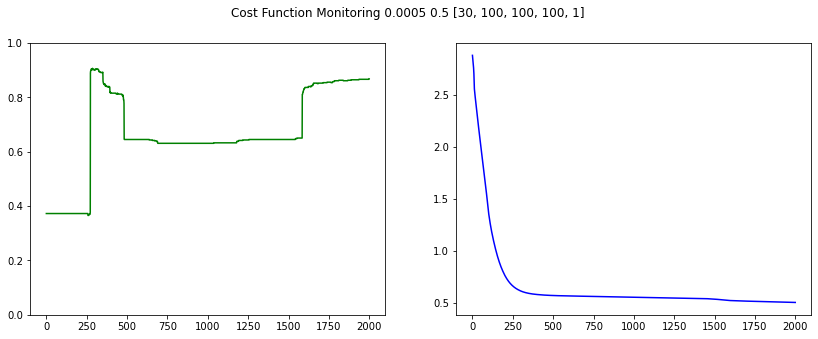

epoch:100: cost:0.6984549581551368: acc:0.36379613356766255: time:0:00:00.006980
epoch:200: cost:0.6254437819720762: acc:0.789103690685413: time:0:00:00.005983
epoch:300: cost:0.5943743353162582: acc:0.8418277680140598: time:0:00:00.005982
epoch:400: cost:0.5739713361083519: acc:0.8488576449912126: time:0:00:00.005983
epoch:500: cost:0.5635597907334536: acc:0.7258347978910369: time:0:00:00.006983
epoch:600: cost:0.550427791277054: acc:0.7521968365553603: time:0:00:00.006981
epoch:700: cost:0.5400575123686836: acc:0.7750439367311072: time:0:00:00.006913
epoch:800: cost:0.5281638380223144: acc:0.8031634446397188: time:0:00:00.007980
epoch:900: cost:0.5220533364417091: acc:0.8066783831282952: time:0:00:00.008979
epoch:1000: cost:0.5162098313682618: acc:0.8101933216168717: time:0:00:00.005984
epoch:1100: cost:0.5082548983199391: acc:0.8224956063268892: time:0:00:00.005982
epoch:1200: cost:0.5036452857376177: acc:0.8224956063268892: time:0:00:00.004986
epoch:1300: cost:0.49926879938098145: 

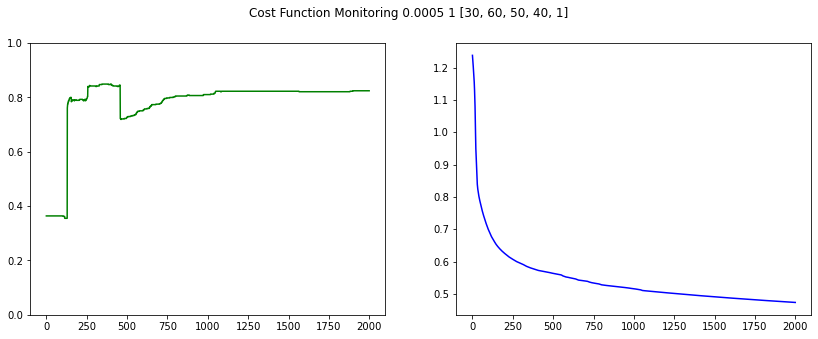

epoch:100: cost:1.2867500161086656: acc:0.37258347978910367: time:0:00:00.003987
epoch:200: cost:1.0278714846532848: acc:0.37258347978910367: time:0:00:00.003989
epoch:300: cost:0.8756684473350471: acc:0.37258347978910367: time:0:00:00.005984
epoch:400: cost:0.7903110996966185: acc:0.3304042179261863: time:0:00:00.003989
epoch:500: cost:0.74280972741941: acc:0.3251318101933216: time:0:00:00.003992
epoch:600: cost:0.7147710588219729: acc:0.6045694200351494: time:0:00:00.004200
epoch:700: cost:0.6981839746196337: acc:0.6115992970123023: time:0:00:00.004986
epoch:800: cost:0.689568013219155: acc:0.6186291739894552: time:0:00:00.003991
epoch:900: cost:0.6849182123953313: acc:0.6186291739894552: time:0:00:00.003989
epoch:1000: cost:0.6817439875342461: acc:0.6221441124780316: time:0:00:00.004986
epoch:1100: cost:0.6798714480886534: acc:0.6239015817223199: time:0:00:00.004419
epoch:1200: cost:0.6783782506594034: acc:0.6256590509666081: time:0:00:00.004988
epoch:1300: cost:0.6774085300134335: 

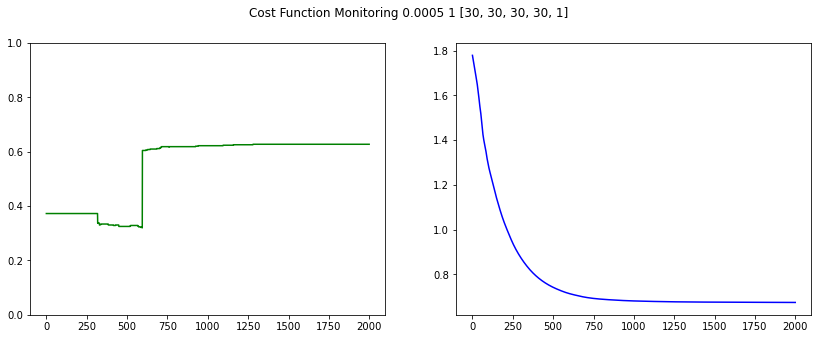

epoch:100: cost:2.154381064065657: acc:0.6274165202108963: time:0:00:00.008979
epoch:200: cost:1.4767955917321511: acc:0.6274165202108963: time:0:00:00.007979
epoch:300: cost:0.9580636275910094: acc:0.6274165202108963: time:0:00:00.007979
epoch:400: cost:0.640490837815418: acc:0.6362038664323374: time:0:00:00.007979
epoch:500: cost:0.4984490557371571: acc:0.8154657293497364: time:0:00:00.007978
epoch:600: cost:0.4386195747484072: acc:0.8295254833040422: time:0:00:00.008977
epoch:700: cost:0.41080285793766474: acc:0.8576449912126538: time:0:00:00.009003
epoch:800: cost:0.3949226873720968: acc:0.8664323374340949: time:0:00:00.011968
epoch:900: cost:0.38222127825101243: acc:0.8646748681898067: time:0:00:00.008974
epoch:1000: cost:0.3704183358842137: acc:0.8804920913884007: time:0:00:00.010973
epoch:1100: cost:0.3609311698385009: acc:0.8840070298769771: time:0:00:00.007979
epoch:1200: cost:0.35275652190374496: acc:0.8857644991212654: time:0:00:00.007955
epoch:1300: cost:0.34539182334793606

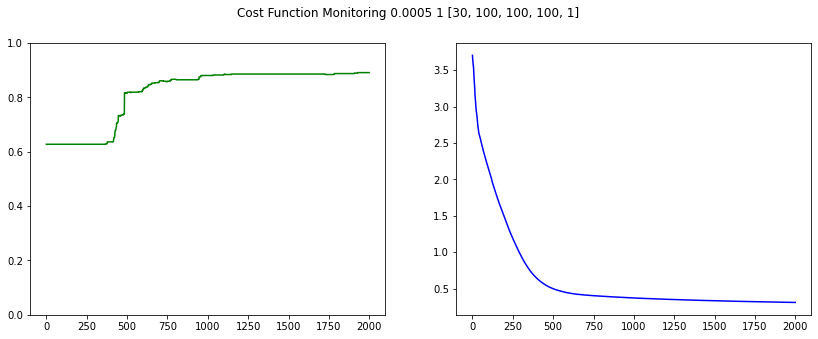

epoch:100: cost:0.696706651786569: acc:0.37258347978910367: time:0:00:00.004300
epoch:200: cost:0.6957203404732857: acc:0.37258347978910367: time:0:00:00.003990
epoch:300: cost:0.6947610309375282: acc:0.37258347978910367: time:0:00:00.006981
epoch:400: cost:0.69382798411169: acc:0.37258347978910367: time:0:00:00.003988
epoch:500: cost:0.6929204805600503: acc:0.6274165202108963: time:0:00:00.003991
epoch:600: cost:0.6920378200139837: acc:0.6274165202108963: time:0:00:00.004976
epoch:700: cost:0.6911793209139453: acc:0.6274165202108963: time:0:00:00.005173
epoch:800: cost:0.690344319958446: acc:0.6274165202108963: time:0:00:00.004987
epoch:900: cost:0.6895321716602086: acc:0.6274165202108963: time:0:00:00.004988
epoch:1000: cost:0.6887422479096649: acc:0.6274165202108963: time:0:00:00.005984
epoch:1100: cost:0.6879739375459285: acc:0.6274165202108963: time:0:00:00.005985
epoch:1200: cost:0.6872266459353544: acc:0.6274165202108963: time:0:00:00.006017
epoch:1300: cost:0.6864997945577728: 

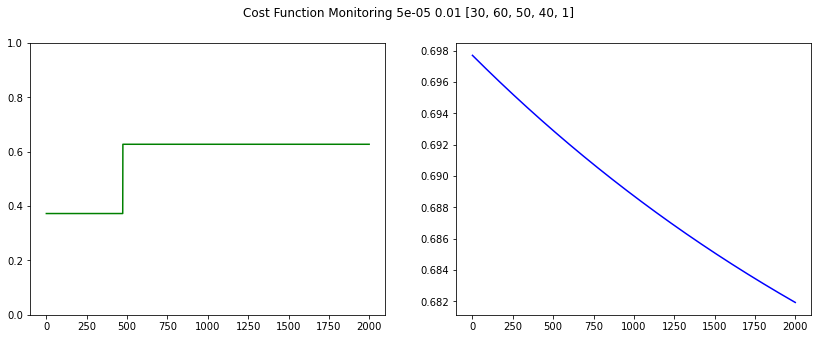

epoch:100: cost:0.6948629962560945: acc:0.37258347978910367: time:0:00:00.002623
epoch:200: cost:0.6941465538642873: acc:0.37258347978910367: time:0:00:00.003991
epoch:300: cost:0.6934451271730494: acc:0.37258347978910367: time:0:00:00.004008
epoch:400: cost:0.6927584011176516: acc:0.6274165202108963: time:0:00:00.003531
epoch:500: cost:0.6920860670687797: acc:0.6274165202108963: time:0:00:00.003010
epoch:600: cost:0.6914278227143948: acc:0.6274165202108963: time:0:00:00.003991
epoch:700: cost:0.6907833719429916: acc:0.6274165202108963: time:0:00:00.003991
epoch:800: cost:0.6901524247282835: acc:0.6274165202108963: time:0:00:00.003987
epoch:900: cost:0.689534697015339: acc:0.6274165202108963: time:0:00:00.002992
epoch:1000: cost:0.6889299106081871: acc:0.6274165202108963: time:0:00:00.003913
epoch:1100: cost:0.6883377930589166: acc:0.6274165202108963: time:0:00:00.003991
epoch:1200: cost:0.6877580775582786: acc:0.6274165202108963: time:0:00:00.004986
epoch:1300: cost:0.68719050282781: 

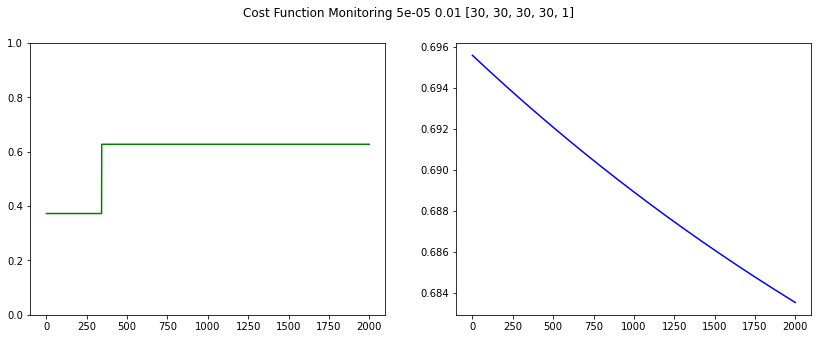

epoch:100: cost:0.6868674220963914: acc:0.6274165202108963: time:0:00:00.006869
epoch:200: cost:0.6852171338664718: acc:0.6274165202108963: time:0:00:00.006978
epoch:300: cost:0.6836707005160894: acc:0.6274165202108963: time:0:00:00.006980
epoch:400: cost:0.6822215359329586: acc:0.6274165202108963: time:0:00:00.005986
epoch:500: cost:0.6808634682069674: acc:0.6274165202108963: time:0:00:00.006980
epoch:600: cost:0.6795907148981799: acc:0.6274165202108963: time:0:00:00.006965
epoch:700: cost:0.6783978595304023: acc:0.6274165202108963: time:0:00:00.006986
epoch:800: cost:0.6772798292921111: acc:0.6274165202108963: time:0:00:00.012977
epoch:900: cost:0.676231873918733: acc:0.6274165202108963: time:0:00:00.007977
epoch:1000: cost:0.6752495457241589: acc:0.6274165202108963: time:0:00:00.007979
epoch:1100: cost:0.6743286807447088: acc:0.6274165202108963: time:0:00:00.007978
epoch:1200: cost:0.6734653809553366: acc:0.6274165202108963: time:0:00:00.008976
epoch:1300: cost:0.6726559975154702: a

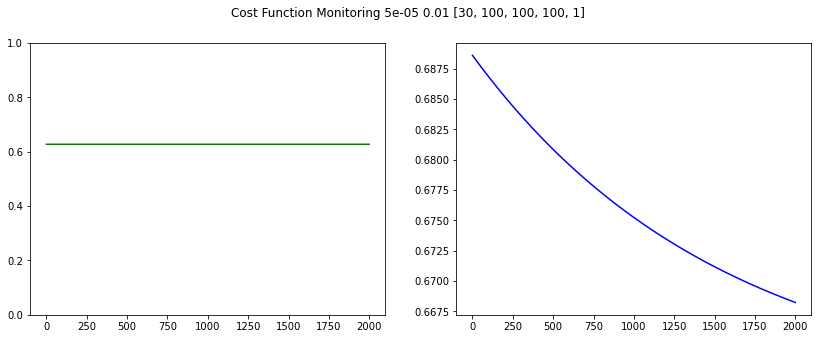

epoch:100: cost:0.7349461896525906: acc:0.37258347978910367: time:0:00:00.004987
epoch:200: cost:0.7326484980432612: acc:0.37258347978910367: time:0:00:00.004989
epoch:300: cost:0.7304231696733413: acc:0.37258347978910367: time:0:00:00.005005
epoch:400: cost:0.7282655130876693: acc:0.37258347978910367: time:0:00:00.005984
epoch:500: cost:0.726172021265395: acc:0.37258347978910367: time:0:00:00.005989
epoch:600: cost:0.7241397080359807: acc:0.37258347978910367: time:0:00:00.005013
epoch:700: cost:0.7221659740768313: acc:0.37258347978910367: time:0:00:00.006980
epoch:800: cost:0.7202487756457496: acc:0.37258347978910367: time:0:00:00.004983
epoch:900: cost:0.7183866227880079: acc:0.37258347978910367: time:0:00:00.006007
epoch:1000: cost:0.7165783337392168: acc:0.37258347978910367: time:0:00:00.005176
epoch:1100: cost:0.7148227896911581: acc:0.37258347978910367: time:0:00:00.004489
epoch:1200: cost:0.7131189525809857: acc:0.37258347978910367: time:0:00:00.004988
epoch:1300: cost:0.7114660

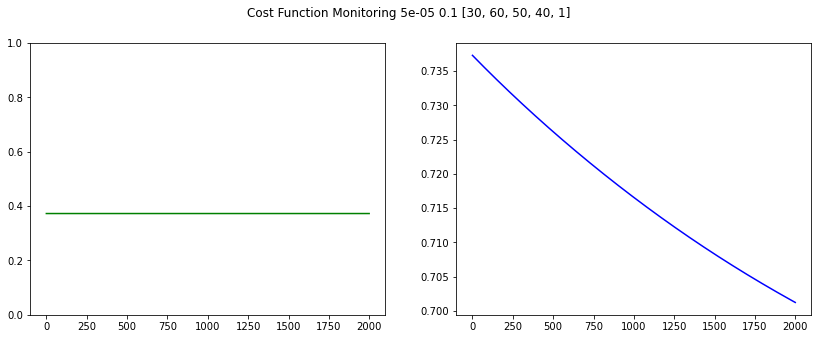

epoch:100: cost:0.7177998555582649: acc:0.37258347978910367: time:0:00:00.003992
epoch:200: cost:0.7165098682616452: acc:0.37258347978910367: time:0:00:00.004983
epoch:300: cost:0.7152522519632518: acc:0.37258347978910367: time:0:00:00.004018
epoch:400: cost:0.7140258680680858: acc:0.37258347978910367: time:0:00:00.003989
epoch:500: cost:0.7128295930905841: acc:0.37258347978910367: time:0:00:00.003988
epoch:600: cost:0.7116622927559629: acc:0.37258347978910367: time:0:00:00.003986
epoch:700: cost:0.7105228184713257: acc:0.37258347978910367: time:0:00:00.003990
epoch:800: cost:0.7094101058199832: acc:0.37258347978910367: time:0:00:00.003992
epoch:900: cost:0.7083232993061948: acc:0.37258347978910367: time:0:00:00.003989
epoch:1000: cost:0.7072617406922888: acc:0.37258347978910367: time:0:00:00.003989
epoch:1100: cost:0.706224841444673: acc:0.37258347978910367: time:0:00:00.003991
epoch:1200: cost:0.7052119913811569: acc:0.37258347978910367: time:0:00:00.002992
epoch:1300: cost:0.7042225

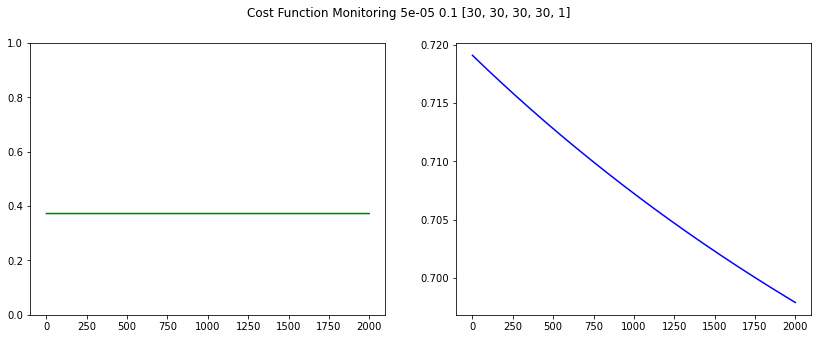

epoch:100: cost:0.690341437226398: acc:0.6274165202108963: time:0:00:00.006782
epoch:200: cost:0.6883692510354774: acc:0.6274165202108963: time:0:00:00.006281
epoch:300: cost:0.6865239071410956: acc:0.6274165202108963: time:0:00:00.010001
epoch:400: cost:0.6847937570179227: acc:0.6274165202108963: time:0:00:00.008976
epoch:500: cost:0.6831679489694008: acc:0.6274165202108963: time:0:00:00.008979
epoch:600: cost:0.6816437706612865: acc:0.6274165202108963: time:0:00:00.007977
epoch:700: cost:0.680214752001043: acc:0.6274165202108963: time:0:00:00.008974
epoch:800: cost:0.678875937587699: acc:0.6274165202108963: time:0:00:00.006983
epoch:900: cost:0.677621091384748: acc:0.6274165202108963: time:0:00:00.006008
epoch:1000: cost:0.6764429746747024: acc:0.6274165202108963: time:0:00:00.007958
epoch:1100: cost:0.6753357538144906: acc:0.6274165202108963: time:0:00:00.006981
epoch:1200: cost:0.6742948776927958: acc:0.6274165202108963: time:0:00:00.006980
epoch:1300: cost:0.6733164396000021: acc:

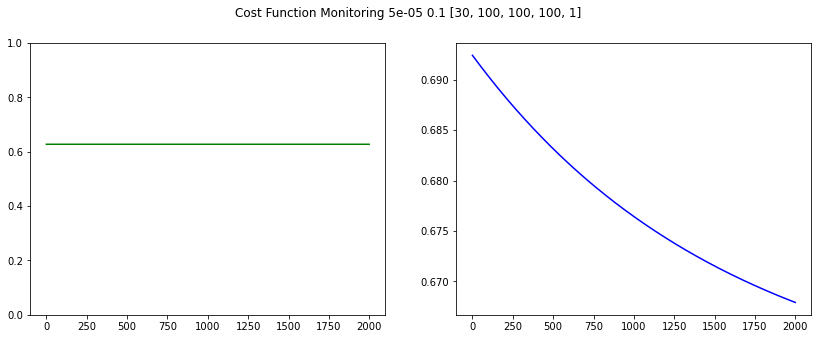

epoch:100: cost:1.5206496874450877: acc:0.37258347978910367: time:0:00:00.004987
epoch:200: cost:1.4799177181144916: acc:0.37258347978910367: time:0:00:00.004986
epoch:300: cost:1.439649259515124: acc:0.37258347978910367: time:0:00:00.005735
epoch:400: cost:1.401344382208604: acc:0.37258347978910367: time:0:00:00.004986
epoch:500: cost:1.3634612196230866: acc:0.37258347978910367: time:0:00:00.004983
epoch:600: cost:1.3248284222994808: acc:0.37258347978910367: time:0:00:00.005959
epoch:700: cost:1.2876063768620927: acc:0.37258347978910367: time:0:00:00.004986
epoch:800: cost:1.2512836486808139: acc:0.37258347978910367: time:0:00:00.007980
epoch:900: cost:1.2150113895265808: acc:0.37258347978910367: time:0:00:00.004986
epoch:1000: cost:1.177691787829182: acc:0.37258347978910367: time:0:00:00.005985
epoch:1100: cost:1.137246337877509: acc:0.37258347978910367: time:0:00:00.005943
epoch:1200: cost:1.1008481668550887: acc:0.37258347978910367: time:0:00:00.006984
epoch:1300: cost:1.0661103899

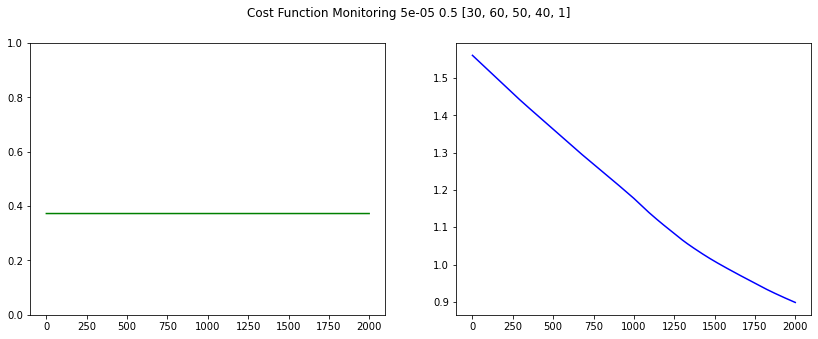

epoch:100: cost:0.840219771544768: acc:0.6274165202108963: time:0:00:00.004330
epoch:200: cost:0.8359390789221602: acc:0.6274165202108963: time:0:00:00.004987
epoch:300: cost:0.8317270935856004: acc:0.6274165202108963: time:0:00:00.004986
epoch:400: cost:0.8275808572435513: acc:0.6274165202108963: time:0:00:00.004431
epoch:500: cost:0.823496124282973: acc:0.6274165202108963: time:0:00:00.004985
epoch:600: cost:0.8194674837074957: acc:0.6274165202108963: time:0:00:00.003991
epoch:700: cost:0.8154902234228514: acc:0.6274165202108963: time:0:00:00.003990
epoch:800: cost:0.8115630958488117: acc:0.6274165202108963: time:0:00:00.003992
epoch:900: cost:0.8076886595455502: acc:0.6274165202108963: time:0:00:00.004988
epoch:1000: cost:0.803874481868752: acc:0.6274165202108963: time:0:00:00.003988
epoch:1100: cost:0.8001416139696857: acc:0.6274165202108963: time:0:00:00.005986
epoch:1200: cost:0.7965102319819944: acc:0.6274165202108963: time:0:00:00.006982
epoch:1300: cost:0.7929675381881701: acc

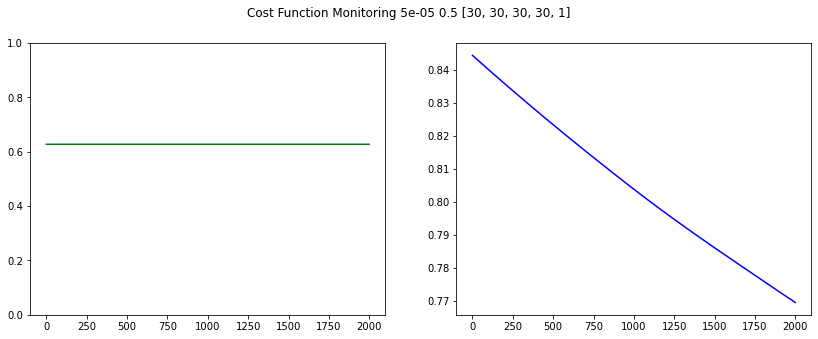

epoch:100: cost:1.0191353868353121: acc:0.37258347978910367: time:0:00:00.007974
epoch:200: cost:0.9614182430816958: acc:0.37258347978910367: time:0:00:00.007942
epoch:300: cost:0.9071420584618664: acc:0.37258347978910367: time:0:00:00.007979
epoch:400: cost:0.8625736811499638: acc:0.37258347978910367: time:0:00:00.007003
epoch:500: cost:0.8265225505935719: acc:0.37258347978910367: time:0:00:00.007979
epoch:600: cost:0.7965246881258707: acc:0.37258347978910367: time:0:00:00.008976
epoch:700: cost:0.7706177443133189: acc:0.37258347978910367: time:0:00:00.008946
epoch:800: cost:0.7478984131203406: acc:0.37082601054481545: time:0:00:00.011968
epoch:900: cost:0.7249313222575106: acc:0.37082601054481545: time:0:00:00.009973
epoch:1000: cost:0.7028797844480656: acc:0.3655536028119508: time:0:00:00.007976
epoch:1100: cost:0.6841598929682947: acc:0.6063268892794376: time:0:00:00.006980
epoch:1200: cost:0.6695462571243286: acc:0.671353251318102: time:0:00:00.007977
epoch:1300: cost:0.6566992397

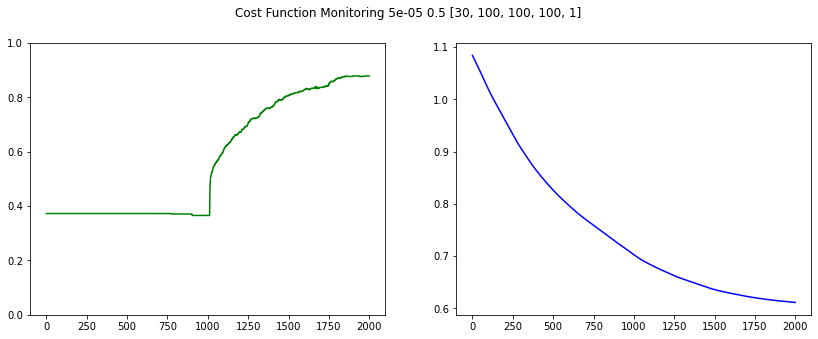

epoch:100: cost:0.6696150996049036: acc:0.6239015817223199: time:0:00:00.006006
epoch:200: cost:0.6545531656508604: acc:0.6256590509666081: time:0:00:00.006982
epoch:300: cost:0.6404729249467769: acc:0.6274165202108963: time:0:00:00.004986
epoch:400: cost:0.6337427178930242: acc:0.6274165202108963: time:0:00:00.005019
epoch:500: cost:0.6221177591560451: acc:0.6274165202108963: time:0:00:00.004986
epoch:600: cost:0.61054667834751: acc:0.6274165202108963: time:0:00:00.005853
epoch:700: cost:0.6059784146832694: acc:0.6274165202108963: time:0:00:00.004877
epoch:800: cost:0.6024678959308827: acc:0.6274165202108963: time:0:00:00.005226
epoch:900: cost:0.5987058254741604: acc:0.6274165202108963: time:0:00:00.005826
epoch:1000: cost:0.5973820550819061: acc:0.6274165202108963: time:0:00:00.004986
epoch:1100: cost:0.5961496266362581: acc:0.6274165202108963: time:0:00:00.004990
epoch:1200: cost:0.5937166896613119: acc:0.6291739894551845: time:0:00:00.006980
epoch:1300: cost:0.587667407001152: acc

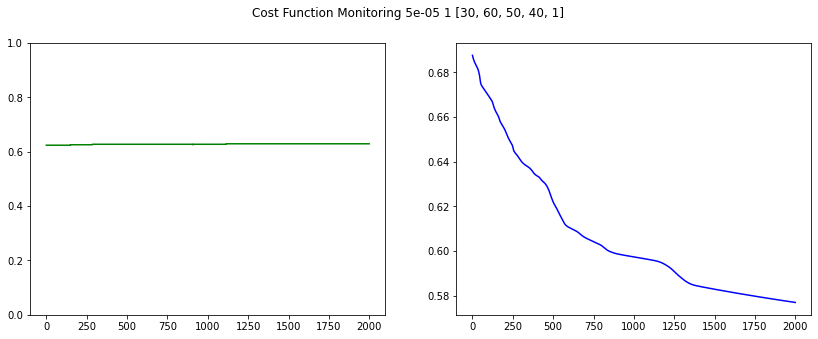

epoch:100: cost:2.078552863084063: acc:0.37258347978910367: time:0:00:00.003987
epoch:200: cost:2.0308081593590206: acc:0.37258347978910367: time:0:00:00.003990
epoch:300: cost:1.9859206474054216: acc:0.37258347978910367: time:0:00:00.004986
epoch:400: cost:1.9399677172861791: acc:0.37258347978910367: time:0:00:00.004985
epoch:500: cost:1.894424095906984: acc:0.37258347978910367: time:0:00:00.004525
epoch:600: cost:1.8531509578698542: acc:0.37258347978910367: time:0:00:00.005652
epoch:700: cost:1.8142012688732554: acc:0.37258347978910367: time:0:00:00.004319
epoch:800: cost:1.776067770966109: acc:0.37258347978910367: time:0:00:00.003990
epoch:900: cost:1.738430437021358: acc:0.37258347978910367: time:0:00:00.004985
epoch:1000: cost:1.7011879118530888: acc:0.37258347978910367: time:0:00:00.003993
epoch:1100: cost:1.6644413061260932: acc:0.37258347978910367: time:0:00:00.004985
epoch:1200: cost:1.6282903608837267: acc:0.37258347978910367: time:0:00:00.004986
epoch:1300: cost:1.5926462187

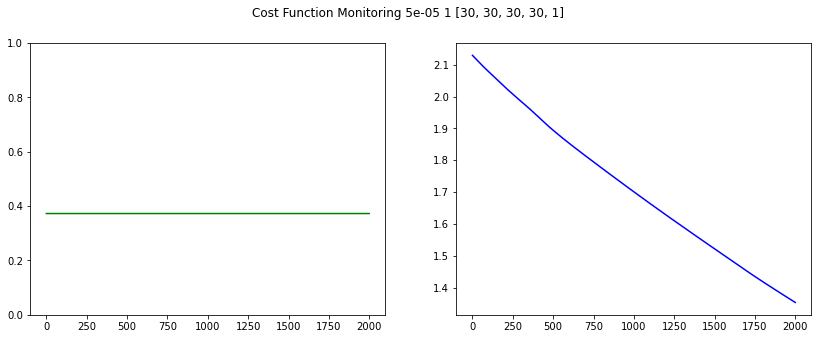

epoch:100: cost:4.393824681535018: acc:0.37258347978910367: time:0:00:00.007998
epoch:200: cost:4.175793385809939: acc:0.37258347978910367: time:0:00:00.008012
epoch:300: cost:3.968240073723286: acc:0.37258347978910367: time:0:00:00.008177
epoch:400: cost:3.776340937902065: acc:0.37258347978910367: time:0:00:00.008001
epoch:500: cost:3.6071017157437892: acc:0.37258347978910367: time:0:00:00.008975
epoch:600: cost:3.443044909476921: acc:0.37258347978910367: time:0:00:00.008973
epoch:700: cost:3.262898319530003: acc:0.37258347978910367: time:0:00:00.010971
epoch:800: cost:3.075116923716944: acc:0.37258347978910367: time:0:00:00.009973
epoch:900: cost:2.9080978519972693: acc:0.37258347978910367: time:0:00:00.009971
epoch:1000: cost:2.738142360521366: acc:0.37258347978910367: time:0:00:00.007979
epoch:1100: cost:2.572734805571866: acc:0.37258347978910367: time:0:00:00.008973
epoch:1200: cost:2.413260512247594: acc:0.37258347978910367: time:0:00:00.007976
epoch:1300: cost:2.2414279135713526

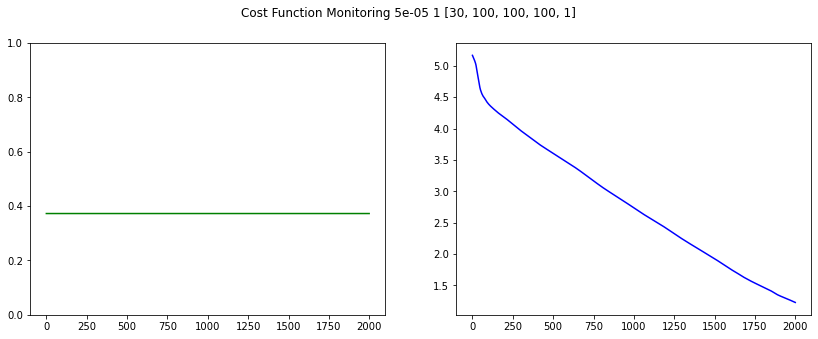

In [43]:
for eta in [0.05,0.01,0.005,0.0005,0.00005]:
    for epsilon in [0.01,0.1,0.5,1]:
        for layer in [[30,60,50,40,1],[30,30,30,30,1],[30,100,100,100,1]]:
            parameters = nn_build(eta = eta, iterations= 2000, epsilon= epsilon, layer_dims= layer).fit(X,y)